In [1]:
from preprocessing import *
from train_evaluate import *
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torchsummary import summary

import numpy as np

# Data Setup

## Load Data

In [2]:
data_dir = '/Users/michael/Desktop/Home/研究所/ECE247/projects/data/'
X_train_valid, y_train_valid, X_test, y_test = load_data(data_dir, subjects=[1,2,3,4,5,6,7,8,9]) # default subjects=[1,2,3,4,5,6,7,8,9]

## Preprocessing

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = main_prep(X_train_valid,y_train_valid,X_test, y_test,2,2,True)

Shape of x_train: (6768, 250, 1, 22)
Shape of x_valid: (1692, 250, 1, 22)
Shape of x_test: (1772, 250, 1, 22)
Shape of y_train: torch.Size([6768, 4])
Shape of y_valid: torch.Size([1692, 4])
Shape of y_test: torch.Size([1772, 4])


## PyTorch Dataloaders

In [4]:
data_loaders  = dataloader_setup(x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size=32)

## Parameters

In [5]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Modeling (CNN, LSTM, GRU, CNN+LSTM, CNN+GRU)

## CNN

In [6]:
# # Building the CNN model using sequential class
class CNN(nn.Module):
    # initializers
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(22, 25, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool1 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(1, 0))
        self.bn1 = nn.BatchNorm2d(25)
        self.dropout = nn.Dropout2d(p=0.5)

        self.conv2 = nn.Conv2d(25, 50, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool2 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(0, 0))
        self.bn2 = nn.BatchNorm2d(50)

        self.conv3 = nn.Conv2d(50, 100, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool3 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(0, 0))
        self.bn3 = nn.BatchNorm2d(100)

        self.conv4 = nn.Conv2d(100, 200, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool4 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(1, 0))
        self.bn4 = nn.BatchNorm2d(200)
        
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(800,4)
        

    # forward method
    def forward(self, input):  #input(22,250,1)
        x = input.permute(0,1,3,2)
        x = self.dropout(self.bn1(self.pool1(F.elu(self.conv1(x)))))
        x = self.dropout(self.bn2(self.pool2(F.elu(self.conv2(x)))))
        x = self.dropout(self.bn3(self.pool3(F.elu(self.conv3(x)))))
        x = self.dropout(self.bn4(self.pool4(F.elu(self.conv4(x)))))
        x = self.flatten(x)
        out = self.dense(x) 
        return out

In [7]:
# initiate LSTM model
cnn = CNN()

# create your optimizer
optimizer = optim.Adam(cnn.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/6768 (0.00%)]		Loss: 1.46058
Training Progress: 	Epoch 1 [320/6768 (4.72%)]		Loss: 1.57104
Training Progress: 	Epoch 1 [640/6768 (9.43%)]		Loss: 1.49610
Training Progress: 	Epoch 1 [960/6768 (14.15%)]		Loss: 1.61831
Training Progress: 	Epoch 1 [1280/6768 (18.87%)]		Loss: 1.57288
Training Progress: 	Epoch 1 [1600/6768 (23.58%)]		Loss: 1.44407
Training Progress: 	Epoch 1 [1920/6768 (28.30%)]		Loss: 1.55952
Training Progress: 	Epoch 1 [2240/6768 (33.02%)]		Loss: 1.69810
Training Progress: 	Epoch 1 [2560/6768 (37.74%)]		Loss: 1.41124
Training Progress: 	Epoch 1 [2880/6768 (42.45%)]		Loss: 1.29225
Training Progress: 	Epoch 1 [3200/6768 (47.17%)]		Loss: 1.34996
Training Progress: 	Epoch 1 [3520/6768 (51.89%)]		Loss: 1.43967
Training Progress: 	Epoch 1 [3840/6768 (56.60%)]		Loss: 1.46265
Training Progress: 	Epoch 1 [4160/6768 (61.32%)]		Loss: 1.55334
Training Progress: 	Epoch 1 [4480/6768 (66.04%)]		Loss: 1.41508
Training Progress: 	Epoch 1 [4800/6768 (70.75%)]	

Training Progress: 	Epoch 6 [2240/6768 (33.02%)]		Loss: 1.17823
Training Progress: 	Epoch 6 [2560/6768 (37.74%)]		Loss: 0.91725
Training Progress: 	Epoch 6 [2880/6768 (42.45%)]		Loss: 0.84757
Training Progress: 	Epoch 6 [3200/6768 (47.17%)]		Loss: 0.83353
Training Progress: 	Epoch 6 [3520/6768 (51.89%)]		Loss: 1.07420
Training Progress: 	Epoch 6 [3840/6768 (56.60%)]		Loss: 0.97282
Training Progress: 	Epoch 6 [4160/6768 (61.32%)]		Loss: 1.08034
Training Progress: 	Epoch 6 [4480/6768 (66.04%)]		Loss: 0.82544
Training Progress: 	Epoch 6 [4800/6768 (70.75%)]		Loss: 0.98334
Training Progress: 	Epoch 6 [5120/6768 (75.47%)]		Loss: 1.13256
Training Progress: 	Epoch 6 [5440/6768 (80.19%)]		Loss: 1.55104
Training Progress: 	Epoch 6 [5760/6768 (84.91%)]		Loss: 1.08462
Training Progress: 	Epoch 6 [6080/6768 (89.62%)]		Loss: 1.15319
Training Progress: 	Epoch 6 [6400/6768 (94.34%)]		Loss: 0.99871
Training Progress: 	Epoch 6 [6720/6768 (99.06%)]		Loss: 1.14440
	Train loss: 0.03202, Accuracy: 3842/676

Training Progress: 	Epoch 11 [4160/6768 (61.32%)]		Loss: 0.83125
Training Progress: 	Epoch 11 [4480/6768 (66.04%)]		Loss: 0.87285
Training Progress: 	Epoch 11 [4800/6768 (70.75%)]		Loss: 0.85606
Training Progress: 	Epoch 11 [5120/6768 (75.47%)]		Loss: 0.86581
Training Progress: 	Epoch 11 [5440/6768 (80.19%)]		Loss: 1.32205
Training Progress: 	Epoch 11 [5760/6768 (84.91%)]		Loss: 0.89799
Training Progress: 	Epoch 11 [6080/6768 (89.62%)]		Loss: 1.12713
Training Progress: 	Epoch 11 [6400/6768 (94.34%)]		Loss: 0.82909
Training Progress: 	Epoch 11 [6720/6768 (99.06%)]		Loss: 0.95762
	Train loss: 0.02787, Accuracy: 4390/6768 (64.00%)
	Validation loss: 0.00055, Accuracy: 1095/1692 (64.00%)
	Test loss: 0.00063, Accuracy: 973/1772 (54.00%)

Training Progress: 	Epoch 12 [0/6768 (0.00%)]		Loss: 0.76999
Training Progress: 	Epoch 12 [320/6768 (4.72%)]		Loss: 1.35205
Training Progress: 	Epoch 12 [640/6768 (9.43%)]		Loss: 1.32626
Training Progress: 	Epoch 12 [960/6768 (14.15%)]		Loss: 0.86877
Trainin

Training Progress: 	Epoch 16 [5760/6768 (84.91%)]		Loss: 0.71993
Training Progress: 	Epoch 16 [6080/6768 (89.62%)]		Loss: 0.90007
Training Progress: 	Epoch 16 [6400/6768 (94.34%)]		Loss: 0.62674
Training Progress: 	Epoch 16 [6720/6768 (99.06%)]		Loss: 0.84553
	Train loss: 0.02338, Accuracy: 4800/6768 (70.00%)
	Validation loss: 0.00047, Accuracy: 1188/1692 (70.00%)
	Test loss: 0.00060, Accuracy: 1032/1772 (58.00%)

Training Progress: 	Epoch 17 [0/6768 (0.00%)]		Loss: 0.86521
Training Progress: 	Epoch 17 [320/6768 (4.72%)]		Loss: 0.81813
Training Progress: 	Epoch 17 [640/6768 (9.43%)]		Loss: 0.98331
Training Progress: 	Epoch 17 [960/6768 (14.15%)]		Loss: 0.97789
Training Progress: 	Epoch 17 [1280/6768 (18.87%)]		Loss: 0.67420
Training Progress: 	Epoch 17 [1600/6768 (23.58%)]		Loss: 0.70739
Training Progress: 	Epoch 17 [1920/6768 (28.30%)]		Loss: 0.78738
Training Progress: 	Epoch 17 [2240/6768 (33.02%)]		Loss: 0.74357
Training Progress: 	Epoch 17 [2560/6768 (37.74%)]		Loss: 0.72100
Traini

	Validation loss: 0.00044, Accuracy: 1215/1692 (71.00%)
	Test loss: 0.00062, Accuracy: 1014/1772 (57.00%)

Training Progress: 	Epoch 22 [0/6768 (0.00%)]		Loss: 0.60063
Training Progress: 	Epoch 22 [320/6768 (4.72%)]		Loss: 0.91485
Training Progress: 	Epoch 22 [640/6768 (9.43%)]		Loss: 0.78569
Training Progress: 	Epoch 22 [960/6768 (14.15%)]		Loss: 0.71172
Training Progress: 	Epoch 22 [1280/6768 (18.87%)]		Loss: 0.83234
Training Progress: 	Epoch 22 [1600/6768 (23.58%)]		Loss: 0.36491
Training Progress: 	Epoch 22 [1920/6768 (28.30%)]		Loss: 0.78550
Training Progress: 	Epoch 22 [2240/6768 (33.02%)]		Loss: 0.40748
Training Progress: 	Epoch 22 [2560/6768 (37.74%)]		Loss: 0.68612
Training Progress: 	Epoch 22 [2880/6768 (42.45%)]		Loss: 0.46426
Training Progress: 	Epoch 22 [3200/6768 (47.17%)]		Loss: 0.56391
Training Progress: 	Epoch 22 [3520/6768 (51.89%)]		Loss: 0.53701
Training Progress: 	Epoch 22 [3840/6768 (56.60%)]		Loss: 0.70932
Training Progress: 	Epoch 22 [4160/6768 (61.32%)]		Loss: 

Training Progress: 	Epoch 27 [1280/6768 (18.87%)]		Loss: 0.74546
Training Progress: 	Epoch 27 [1600/6768 (23.58%)]		Loss: 0.42305
Training Progress: 	Epoch 27 [1920/6768 (28.30%)]		Loss: 0.57351
Training Progress: 	Epoch 27 [2240/6768 (33.02%)]		Loss: 0.33445
Training Progress: 	Epoch 27 [2560/6768 (37.74%)]		Loss: 0.91514
Training Progress: 	Epoch 27 [2880/6768 (42.45%)]		Loss: 0.59222
Training Progress: 	Epoch 27 [3200/6768 (47.17%)]		Loss: 0.85216
Training Progress: 	Epoch 27 [3520/6768 (51.89%)]		Loss: 0.56071
Training Progress: 	Epoch 27 [3840/6768 (56.60%)]		Loss: 0.52368
Training Progress: 	Epoch 27 [4160/6768 (61.32%)]		Loss: 0.63787
Training Progress: 	Epoch 27 [4480/6768 (66.04%)]		Loss: 0.68962
Training Progress: 	Epoch 27 [4800/6768 (70.75%)]		Loss: 0.79615
Training Progress: 	Epoch 27 [5120/6768 (75.47%)]		Loss: 0.68363
Training Progress: 	Epoch 27 [5440/6768 (80.19%)]		Loss: 0.71077
Training Progress: 	Epoch 27 [5760/6768 (84.91%)]		Loss: 0.61897
Training Progress: 	Epoch

Training Progress: 	Epoch 32 [2880/6768 (42.45%)]		Loss: 0.47676
Training Progress: 	Epoch 32 [3200/6768 (47.17%)]		Loss: 0.51061
Training Progress: 	Epoch 32 [3520/6768 (51.89%)]		Loss: 0.58589
Training Progress: 	Epoch 32 [3840/6768 (56.60%)]		Loss: 0.30969
Training Progress: 	Epoch 32 [4160/6768 (61.32%)]		Loss: 0.52628
Training Progress: 	Epoch 32 [4480/6768 (66.04%)]		Loss: 0.65695
Training Progress: 	Epoch 32 [4800/6768 (70.75%)]		Loss: 0.60501
Training Progress: 	Epoch 32 [5120/6768 (75.47%)]		Loss: 0.69879
Training Progress: 	Epoch 32 [5440/6768 (80.19%)]		Loss: 0.50006
Training Progress: 	Epoch 32 [5760/6768 (84.91%)]		Loss: 0.41784
Training Progress: 	Epoch 32 [6080/6768 (89.62%)]		Loss: 0.66370
Training Progress: 	Epoch 32 [6400/6768 (94.34%)]		Loss: 0.57842
Training Progress: 	Epoch 32 [6720/6768 (99.06%)]		Loss: 0.70504
	Train loss: 0.01606, Accuracy: 5576/6768 (82.00%)
	Validation loss: 0.00036, Accuracy: 1311/1692 (77.00%)
	Test loss: 0.00063, Accuracy: 1056/1772 (59.00%

Training Progress: 	Epoch 37 [4480/6768 (66.04%)]		Loss: 0.48214
Training Progress: 	Epoch 37 [4800/6768 (70.75%)]		Loss: 0.55530
Training Progress: 	Epoch 37 [5120/6768 (75.47%)]		Loss: 0.58860
Training Progress: 	Epoch 37 [5440/6768 (80.19%)]		Loss: 0.80711
Training Progress: 	Epoch 37 [5760/6768 (84.91%)]		Loss: 0.42600
Training Progress: 	Epoch 37 [6080/6768 (89.62%)]		Loss: 0.65740
Training Progress: 	Epoch 37 [6400/6768 (94.34%)]		Loss: 0.48513
Training Progress: 	Epoch 37 [6720/6768 (99.06%)]		Loss: 0.74094
	Train loss: 0.01337, Accuracy: 5684/6768 (83.00%)
	Validation loss: 0.00032, Accuracy: 1350/1692 (79.00%)
	Test loss: 0.00064, Accuracy: 1053/1772 (59.00%)

Training Progress: 	Epoch 38 [0/6768 (0.00%)]		Loss: 0.78943
Training Progress: 	Epoch 38 [320/6768 (4.72%)]		Loss: 0.84139
Training Progress: 	Epoch 38 [640/6768 (9.43%)]		Loss: 0.40784
Training Progress: 	Epoch 38 [960/6768 (14.15%)]		Loss: 0.42759
Training Progress: 	Epoch 38 [1280/6768 (18.87%)]		Loss: 0.34319
Traini

Training Progress: 	Epoch 42 [6080/6768 (89.62%)]		Loss: 0.56647
Training Progress: 	Epoch 42 [6400/6768 (94.34%)]		Loss: 0.33646
Training Progress: 	Epoch 42 [6720/6768 (99.06%)]		Loss: 0.51794
	Train loss: 0.01102, Accuracy: 5907/6768 (87.00%)
	Validation loss: 0.00026, Accuracy: 1408/1692 (83.00%)
	Test loss: 0.00063, Accuracy: 1054/1772 (59.00%)

Training Progress: 	Epoch 43 [0/6768 (0.00%)]		Loss: 0.63658
Training Progress: 	Epoch 43 [320/6768 (4.72%)]		Loss: 0.65690
Training Progress: 	Epoch 43 [640/6768 (9.43%)]		Loss: 0.50616
Training Progress: 	Epoch 43 [960/6768 (14.15%)]		Loss: 0.64885
Training Progress: 	Epoch 43 [1280/6768 (18.87%)]		Loss: 0.83837
Training Progress: 	Epoch 43 [1600/6768 (23.58%)]		Loss: 0.29780
Training Progress: 	Epoch 43 [1920/6768 (28.30%)]		Loss: 0.52346
Training Progress: 	Epoch 43 [2240/6768 (33.02%)]		Loss: 0.40741
Training Progress: 	Epoch 43 [2560/6768 (37.74%)]		Loss: 0.40898
Training Progress: 	Epoch 43 [2880/6768 (42.45%)]		Loss: 0.53961
Traini

	Test loss: 0.00060, Accuracy: 1114/1772 (62.00%)

Training Progress: 	Epoch 48 [0/6768 (0.00%)]		Loss: 0.60909
Training Progress: 	Epoch 48 [320/6768 (4.72%)]		Loss: 0.53226
Training Progress: 	Epoch 48 [640/6768 (9.43%)]		Loss: 0.36114
Training Progress: 	Epoch 48 [960/6768 (14.15%)]		Loss: 0.53911
Training Progress: 	Epoch 48 [1280/6768 (18.87%)]		Loss: 0.37711
Training Progress: 	Epoch 48 [1600/6768 (23.58%)]		Loss: 0.20403
Training Progress: 	Epoch 48 [1920/6768 (28.30%)]		Loss: 0.39005
Training Progress: 	Epoch 48 [2240/6768 (33.02%)]		Loss: 0.51539
Training Progress: 	Epoch 48 [2560/6768 (37.74%)]		Loss: 0.38428
Training Progress: 	Epoch 48 [2880/6768 (42.45%)]		Loss: 0.18225
Training Progress: 	Epoch 48 [3200/6768 (47.17%)]		Loss: 0.24575
Training Progress: 	Epoch 48 [3520/6768 (51.89%)]		Loss: 0.36905
Training Progress: 	Epoch 48 [3840/6768 (56.60%)]		Loss: 0.43800
Training Progress: 	Epoch 48 [4160/6768 (61.32%)]		Loss: 0.50320
Training Progress: 	Epoch 48 [4480/6768 (66.04%)

Training Progress: 	Epoch 53 [1280/6768 (18.87%)]		Loss: 0.54119
Training Progress: 	Epoch 53 [1600/6768 (23.58%)]		Loss: 0.24725
Training Progress: 	Epoch 53 [1920/6768 (28.30%)]		Loss: 0.49627
Training Progress: 	Epoch 53 [2240/6768 (33.02%)]		Loss: 0.25776
Training Progress: 	Epoch 53 [2560/6768 (37.74%)]		Loss: 0.39604
Training Progress: 	Epoch 53 [2880/6768 (42.45%)]		Loss: 0.32849
Training Progress: 	Epoch 53 [3200/6768 (47.17%)]		Loss: 0.62782
Training Progress: 	Epoch 53 [3520/6768 (51.89%)]		Loss: 0.42826
Training Progress: 	Epoch 53 [3840/6768 (56.60%)]		Loss: 0.41446
Training Progress: 	Epoch 53 [4160/6768 (61.32%)]		Loss: 0.27414
Training Progress: 	Epoch 53 [4480/6768 (66.04%)]		Loss: 0.42461
Training Progress: 	Epoch 53 [4800/6768 (70.75%)]		Loss: 0.54746
Training Progress: 	Epoch 53 [5120/6768 (75.47%)]		Loss: 0.52094
Training Progress: 	Epoch 53 [5440/6768 (80.19%)]		Loss: 0.38368
Training Progress: 	Epoch 53 [5760/6768 (84.91%)]		Loss: 0.29741
Training Progress: 	Epoch

Training Progress: 	Epoch 58 [2880/6768 (42.45%)]		Loss: 0.34861
Training Progress: 	Epoch 58 [3200/6768 (47.17%)]		Loss: 0.27886
Training Progress: 	Epoch 58 [3520/6768 (51.89%)]		Loss: 0.34040
Training Progress: 	Epoch 58 [3840/6768 (56.60%)]		Loss: 0.56688
Training Progress: 	Epoch 58 [4160/6768 (61.32%)]		Loss: 0.65819
Training Progress: 	Epoch 58 [4480/6768 (66.04%)]		Loss: 0.48095
Training Progress: 	Epoch 58 [4800/6768 (70.75%)]		Loss: 0.39673
Training Progress: 	Epoch 58 [5120/6768 (75.47%)]		Loss: 0.54401
Training Progress: 	Epoch 58 [5440/6768 (80.19%)]		Loss: 0.43256
Training Progress: 	Epoch 58 [5760/6768 (84.91%)]		Loss: 0.29829
Training Progress: 	Epoch 58 [6080/6768 (89.62%)]		Loss: 0.43824
Training Progress: 	Epoch 58 [6400/6768 (94.34%)]		Loss: 0.33499
Training Progress: 	Epoch 58 [6720/6768 (99.06%)]		Loss: 0.35309
	Train loss: 0.00844, Accuracy: 6171/6768 (91.00%)
	Validation loss: 0.00021, Accuracy: 1481/1692 (87.00%)
	Test loss: 0.00063, Accuracy: 1091/1772 (61.00%

Training Progress: 	Epoch 63 [4480/6768 (66.04%)]		Loss: 0.28997
Training Progress: 	Epoch 63 [4800/6768 (70.75%)]		Loss: 0.46748
Training Progress: 	Epoch 63 [5120/6768 (75.47%)]		Loss: 0.49482
Training Progress: 	Epoch 63 [5440/6768 (80.19%)]		Loss: 0.46663
Training Progress: 	Epoch 63 [5760/6768 (84.91%)]		Loss: 0.39155
Training Progress: 	Epoch 63 [6080/6768 (89.62%)]		Loss: 0.30323
Training Progress: 	Epoch 63 [6400/6768 (94.34%)]		Loss: 0.24510
Training Progress: 	Epoch 63 [6720/6768 (99.06%)]		Loss: 0.49540
	Train loss: 0.00694, Accuracy: 6223/6768 (91.00%)
	Validation loss: 0.00018, Accuracy: 1498/1692 (88.00%)
	Test loss: 0.00063, Accuracy: 1083/1772 (61.00%)

Training Progress: 	Epoch 64 [0/6768 (0.00%)]		Loss: 0.27394
Training Progress: 	Epoch 64 [320/6768 (4.72%)]		Loss: 0.53561
Training Progress: 	Epoch 64 [640/6768 (9.43%)]		Loss: 0.38996
Training Progress: 	Epoch 64 [960/6768 (14.15%)]		Loss: 0.45277
Training Progress: 	Epoch 64 [1280/6768 (18.87%)]		Loss: 0.44770
Traini

Training Progress: 	Epoch 68 [6080/6768 (89.62%)]		Loss: 0.42078
Training Progress: 	Epoch 68 [6400/6768 (94.34%)]		Loss: 0.19528
Training Progress: 	Epoch 68 [6720/6768 (99.06%)]		Loss: 0.51360
	Train loss: 0.00769, Accuracy: 6175/6768 (91.00%)
	Validation loss: 0.00020, Accuracy: 1465/1692 (86.00%)
	Test loss: 0.00066, Accuracy: 1078/1772 (60.00%)

Training Progress: 	Epoch 69 [0/6768 (0.00%)]		Loss: 0.50604
Training Progress: 	Epoch 69 [320/6768 (4.72%)]		Loss: 0.64816
Training Progress: 	Epoch 69 [640/6768 (9.43%)]		Loss: 0.42003
Training Progress: 	Epoch 69 [960/6768 (14.15%)]		Loss: 0.26109
Training Progress: 	Epoch 69 [1280/6768 (18.87%)]		Loss: 0.60085
Training Progress: 	Epoch 69 [1600/6768 (23.58%)]		Loss: 0.53356
Training Progress: 	Epoch 69 [1920/6768 (28.30%)]		Loss: 0.26525
Training Progress: 	Epoch 69 [2240/6768 (33.02%)]		Loss: 0.17645
Training Progress: 	Epoch 69 [2560/6768 (37.74%)]		Loss: 0.63022
Training Progress: 	Epoch 69 [2880/6768 (42.45%)]		Loss: 0.25811
Traini

	Test loss: 0.00063, Accuracy: 1093/1772 (61.00%)

Training Progress: 	Epoch 74 [0/6768 (0.00%)]		Loss: 0.54422
Training Progress: 	Epoch 74 [320/6768 (4.72%)]		Loss: 0.39057
Training Progress: 	Epoch 74 [640/6768 (9.43%)]		Loss: 0.34139
Training Progress: 	Epoch 74 [960/6768 (14.15%)]		Loss: 0.23082
Training Progress: 	Epoch 74 [1280/6768 (18.87%)]		Loss: 0.42880
Training Progress: 	Epoch 74 [1600/6768 (23.58%)]		Loss: 0.39706
Training Progress: 	Epoch 74 [1920/6768 (28.30%)]		Loss: 0.40163
Training Progress: 	Epoch 74 [2240/6768 (33.02%)]		Loss: 0.40135
Training Progress: 	Epoch 74 [2560/6768 (37.74%)]		Loss: 0.46437
Training Progress: 	Epoch 74 [2880/6768 (42.45%)]		Loss: 0.26447
Training Progress: 	Epoch 74 [3200/6768 (47.17%)]		Loss: 0.23024
Training Progress: 	Epoch 74 [3520/6768 (51.89%)]		Loss: 0.25417
Training Progress: 	Epoch 74 [3840/6768 (56.60%)]		Loss: 0.33177
Training Progress: 	Epoch 74 [4160/6768 (61.32%)]		Loss: 0.49646
Training Progress: 	Epoch 74 [4480/6768 (66.04%)

Training Progress: 	Epoch 79 [1280/6768 (18.87%)]		Loss: 0.33042
Training Progress: 	Epoch 79 [1600/6768 (23.58%)]		Loss: 0.14910
Training Progress: 	Epoch 79 [1920/6768 (28.30%)]		Loss: 0.33711
Training Progress: 	Epoch 79 [2240/6768 (33.02%)]		Loss: 0.15556
Training Progress: 	Epoch 79 [2560/6768 (37.74%)]		Loss: 0.30885
Training Progress: 	Epoch 79 [2880/6768 (42.45%)]		Loss: 0.44914
Training Progress: 	Epoch 79 [3200/6768 (47.17%)]		Loss: 0.35636
Training Progress: 	Epoch 79 [3520/6768 (51.89%)]		Loss: 0.21176
Training Progress: 	Epoch 79 [3840/6768 (56.60%)]		Loss: 0.23687
Training Progress: 	Epoch 79 [4160/6768 (61.32%)]		Loss: 0.29874
Training Progress: 	Epoch 79 [4480/6768 (66.04%)]		Loss: 0.23999
Training Progress: 	Epoch 79 [4800/6768 (70.75%)]		Loss: 0.31195
Training Progress: 	Epoch 79 [5120/6768 (75.47%)]		Loss: 0.21415
Training Progress: 	Epoch 79 [5440/6768 (80.19%)]		Loss: 0.46132
Training Progress: 	Epoch 79 [5760/6768 (84.91%)]		Loss: 0.40379
Training Progress: 	Epoch

Training Progress: 	Epoch 84 [2880/6768 (42.45%)]		Loss: 0.22948
Training Progress: 	Epoch 84 [3200/6768 (47.17%)]		Loss: 0.31559
Training Progress: 	Epoch 84 [3520/6768 (51.89%)]		Loss: 0.62649
Training Progress: 	Epoch 84 [3840/6768 (56.60%)]		Loss: 0.29833
Training Progress: 	Epoch 84 [4160/6768 (61.32%)]		Loss: 0.27670
Training Progress: 	Epoch 84 [4480/6768 (66.04%)]		Loss: 0.26052
Training Progress: 	Epoch 84 [4800/6768 (70.75%)]		Loss: 0.31717
Training Progress: 	Epoch 84 [5120/6768 (75.47%)]		Loss: 0.30758
Training Progress: 	Epoch 84 [5440/6768 (80.19%)]		Loss: 0.32968
Training Progress: 	Epoch 84 [5760/6768 (84.91%)]		Loss: 0.33310
Training Progress: 	Epoch 84 [6080/6768 (89.62%)]		Loss: 0.34037
Training Progress: 	Epoch 84 [6400/6768 (94.34%)]		Loss: 0.57163
Training Progress: 	Epoch 84 [6720/6768 (99.06%)]		Loss: 0.30770
	Train loss: 0.00732, Accuracy: 6129/6768 (90.00%)
	Validation loss: 0.00019, Accuracy: 1475/1692 (87.00%)
	Test loss: 0.00069, Accuracy: 1064/1772 (60.00%

Training Progress: 	Epoch 89 [4480/6768 (66.04%)]		Loss: 0.28786
Training Progress: 	Epoch 89 [4800/6768 (70.75%)]		Loss: 0.22928
Training Progress: 	Epoch 89 [5120/6768 (75.47%)]		Loss: 0.24524
Training Progress: 	Epoch 89 [5440/6768 (80.19%)]		Loss: 0.33083
Training Progress: 	Epoch 89 [5760/6768 (84.91%)]		Loss: 0.34346
Training Progress: 	Epoch 89 [6080/6768 (89.62%)]		Loss: 0.30325
Training Progress: 	Epoch 89 [6400/6768 (94.34%)]		Loss: 0.18354
Training Progress: 	Epoch 89 [6720/6768 (99.06%)]		Loss: 0.49297
	Train loss: 0.00728, Accuracy: 6183/6768 (91.00%)
	Validation loss: 0.00019, Accuracy: 1505/1692 (88.00%)
	Test loss: 0.00068, Accuracy: 1096/1772 (61.00%)

Training Progress: 	Epoch 90 [0/6768 (0.00%)]		Loss: 0.32034
Training Progress: 	Epoch 90 [320/6768 (4.72%)]		Loss: 0.60132
Training Progress: 	Epoch 90 [640/6768 (9.43%)]		Loss: 0.30019
Training Progress: 	Epoch 90 [960/6768 (14.15%)]		Loss: 0.49752
Training Progress: 	Epoch 90 [1280/6768 (18.87%)]		Loss: 0.18101
Traini

Training Progress: 	Epoch 94 [6080/6768 (89.62%)]		Loss: 0.47532
Training Progress: 	Epoch 94 [6400/6768 (94.34%)]		Loss: 0.10538
Training Progress: 	Epoch 94 [6720/6768 (99.06%)]		Loss: 0.40657
	Train loss: 0.00629, Accuracy: 6267/6768 (92.00%)
	Validation loss: 0.00016, Accuracy: 1529/1692 (90.00%)
	Test loss: 0.00065, Accuracy: 1116/1772 (62.00%)

Training Progress: 	Epoch 95 [0/6768 (0.00%)]		Loss: 0.36557
Training Progress: 	Epoch 95 [320/6768 (4.72%)]		Loss: 0.22562
Training Progress: 	Epoch 95 [640/6768 (9.43%)]		Loss: 0.59652
Training Progress: 	Epoch 95 [960/6768 (14.15%)]		Loss: 0.18616
Training Progress: 	Epoch 95 [1280/6768 (18.87%)]		Loss: 0.31027
Training Progress: 	Epoch 95 [1600/6768 (23.58%)]		Loss: 0.25580
Training Progress: 	Epoch 95 [1920/6768 (28.30%)]		Loss: 0.39550
Training Progress: 	Epoch 95 [2240/6768 (33.02%)]		Loss: 0.21518
Training Progress: 	Epoch 95 [2560/6768 (37.74%)]		Loss: 0.42360
Training Progress: 	Epoch 95 [2880/6768 (42.45%)]		Loss: 0.24099
Traini

	Test loss: 0.00064, Accuracy: 1115/1772 (62.00%)

Training Progress: 	Epoch 100 [0/6768 (0.00%)]		Loss: 0.61626
Training Progress: 	Epoch 100 [320/6768 (4.72%)]		Loss: 0.35466
Training Progress: 	Epoch 100 [640/6768 (9.43%)]		Loss: 0.28302
Training Progress: 	Epoch 100 [960/6768 (14.15%)]		Loss: 0.18575
Training Progress: 	Epoch 100 [1280/6768 (18.87%)]		Loss: 0.19916
Training Progress: 	Epoch 100 [1600/6768 (23.58%)]		Loss: 0.14456
Training Progress: 	Epoch 100 [1920/6768 (28.30%)]		Loss: 0.16907
Training Progress: 	Epoch 100 [2240/6768 (33.02%)]		Loss: 0.15159
Training Progress: 	Epoch 100 [2560/6768 (37.74%)]		Loss: 0.49588
Training Progress: 	Epoch 100 [2880/6768 (42.45%)]		Loss: 0.21044
Training Progress: 	Epoch 100 [3200/6768 (47.17%)]		Loss: 0.36522
Training Progress: 	Epoch 100 [3520/6768 (51.89%)]		Loss: 0.26390
Training Progress: 	Epoch 100 [3840/6768 (56.60%)]		Loss: 0.34161
Training Progress: 	Epoch 100 [4160/6768 (61.32%)]		Loss: 0.36592
Training Progress: 	Epoch 100 [448

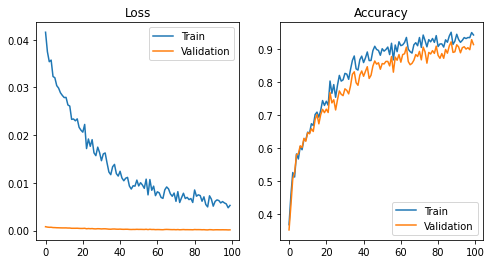

In [8]:
train_and_evaluate(cnn, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

In [9]:
class LSTM(nn.Module):
    
    def __init__(self):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(22, 64, 3, batch_first=True, dropout=0.4)

        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )
    
    def forward(self, x, h=None):

        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        out, _ = self.lstm(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

In [16]:
# initiate LSTM model
lstm = LSTM()

# create your optimizer
optimizer = optim.Adam(lstm.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/6768 (0.00%)]		Loss: 1.36766
Training Progress: 	Epoch 1 [320/6768 (4.72%)]		Loss: 1.35595
Training Progress: 	Epoch 1 [640/6768 (9.43%)]		Loss: 1.46475
Training Progress: 	Epoch 1 [960/6768 (14.15%)]		Loss: 1.39018
Training Progress: 	Epoch 1 [1280/6768 (18.87%)]		Loss: 1.37832
Training Progress: 	Epoch 1 [1600/6768 (23.58%)]		Loss: 1.45167
Training Progress: 	Epoch 1 [1920/6768 (28.30%)]		Loss: 1.36223
Training Progress: 	Epoch 1 [2240/6768 (33.02%)]		Loss: 1.41420
Training Progress: 	Epoch 1 [2560/6768 (37.74%)]		Loss: 1.43996
Training Progress: 	Epoch 1 [2880/6768 (42.45%)]		Loss: 1.32874
Training Progress: 	Epoch 1 [3200/6768 (47.17%)]		Loss: 1.41226
Training Progress: 	Epoch 1 [3520/6768 (51.89%)]		Loss: 1.45990
Training Progress: 	Epoch 1 [3840/6768 (56.60%)]		Loss: 1.39559
Training Progress: 	Epoch 1 [4160/6768 (61.32%)]		Loss: 1.42868
Training Progress: 	Epoch 1 [4480/6768 (66.04%)]		Loss: 1.42906
Training Progress: 	Epoch 1 [4800/6768 (70.75%)]	

Training Progress: 	Epoch 6 [2240/6768 (33.02%)]		Loss: 1.38702
Training Progress: 	Epoch 6 [2560/6768 (37.74%)]		Loss: 1.22347
Training Progress: 	Epoch 6 [2880/6768 (42.45%)]		Loss: 1.38781
Training Progress: 	Epoch 6 [3200/6768 (47.17%)]		Loss: 1.30211
Training Progress: 	Epoch 6 [3520/6768 (51.89%)]		Loss: 1.41932
Training Progress: 	Epoch 6 [3840/6768 (56.60%)]		Loss: 1.30725
Training Progress: 	Epoch 6 [4160/6768 (61.32%)]		Loss: 1.37513
Training Progress: 	Epoch 6 [4480/6768 (66.04%)]		Loss: 1.35713
Training Progress: 	Epoch 6 [4800/6768 (70.75%)]		Loss: 1.28423
Training Progress: 	Epoch 6 [5120/6768 (75.47%)]		Loss: 1.34025
Training Progress: 	Epoch 6 [5440/6768 (80.19%)]		Loss: 1.29774
Training Progress: 	Epoch 6 [5760/6768 (84.91%)]		Loss: 1.28580
Training Progress: 	Epoch 6 [6080/6768 (89.62%)]		Loss: 1.33128
Training Progress: 	Epoch 6 [6400/6768 (94.34%)]		Loss: 1.36016
Training Progress: 	Epoch 6 [6720/6768 (99.06%)]		Loss: 1.23617
	Train loss: 0.04106, Accuracy: 2545/676

Training Progress: 	Epoch 11 [4160/6768 (61.32%)]		Loss: 1.20781
Training Progress: 	Epoch 11 [4480/6768 (66.04%)]		Loss: 1.13126
Training Progress: 	Epoch 11 [4800/6768 (70.75%)]		Loss: 1.02261
Training Progress: 	Epoch 11 [5120/6768 (75.47%)]		Loss: 1.04881
Training Progress: 	Epoch 11 [5440/6768 (80.19%)]		Loss: 1.04522
Training Progress: 	Epoch 11 [5760/6768 (84.91%)]		Loss: 1.18079
Training Progress: 	Epoch 11 [6080/6768 (89.62%)]		Loss: 1.13692
Training Progress: 	Epoch 11 [6400/6768 (94.34%)]		Loss: 1.39959
Training Progress: 	Epoch 11 [6720/6768 (99.06%)]		Loss: 1.03416
	Train loss: 0.03920, Accuracy: 2943/6768 (43.00%)
	Validation loss: 0.00077, Accuracy: 681/1692 (40.00%)
	Test loss: 0.00084, Accuracy: 546/1772 (30.00%)

Training Progress: 	Epoch 12 [0/6768 (0.00%)]		Loss: 0.96458
Training Progress: 	Epoch 12 [320/6768 (4.72%)]		Loss: 1.21620
Training Progress: 	Epoch 12 [640/6768 (9.43%)]		Loss: 1.11183
Training Progress: 	Epoch 12 [960/6768 (14.15%)]		Loss: 1.13072
Training

Training Progress: 	Epoch 16 [5760/6768 (84.91%)]		Loss: 1.21838
Training Progress: 	Epoch 16 [6080/6768 (89.62%)]		Loss: 0.88568
Training Progress: 	Epoch 16 [6400/6768 (94.34%)]		Loss: 1.20201
Training Progress: 	Epoch 16 [6720/6768 (99.06%)]		Loss: 0.85694
	Train loss: 0.03646, Accuracy: 3414/6768 (50.00%)
	Validation loss: 0.00075, Accuracy: 779/1692 (46.00%)
	Test loss: 0.00094, Accuracy: 561/1772 (31.00%)

Training Progress: 	Epoch 17 [0/6768 (0.00%)]		Loss: 0.93307
Training Progress: 	Epoch 17 [320/6768 (4.72%)]		Loss: 1.07947
Training Progress: 	Epoch 17 [640/6768 (9.43%)]		Loss: 0.96990
Training Progress: 	Epoch 17 [960/6768 (14.15%)]		Loss: 0.91765
Training Progress: 	Epoch 17 [1280/6768 (18.87%)]		Loss: 0.94435
Training Progress: 	Epoch 17 [1600/6768 (23.58%)]		Loss: 1.01338
Training Progress: 	Epoch 17 [1920/6768 (28.30%)]		Loss: 1.31783
Training Progress: 	Epoch 17 [2240/6768 (33.02%)]		Loss: 0.87176
Training Progress: 	Epoch 17 [2560/6768 (37.74%)]		Loss: 0.95026
Training

	Validation loss: 0.00074, Accuracy: 872/1692 (51.00%)
	Test loss: 0.00108, Accuracy: 568/1772 (32.00%)

Training Progress: 	Epoch 22 [0/6768 (0.00%)]		Loss: 0.90388
Training Progress: 	Epoch 22 [320/6768 (4.72%)]		Loss: 1.00677
Training Progress: 	Epoch 22 [640/6768 (9.43%)]		Loss: 1.08532
Training Progress: 	Epoch 22 [960/6768 (14.15%)]		Loss: 0.80185
Training Progress: 	Epoch 22 [1280/6768 (18.87%)]		Loss: 0.90921
Training Progress: 	Epoch 22 [1600/6768 (23.58%)]		Loss: 0.59404
Training Progress: 	Epoch 22 [1920/6768 (28.30%)]		Loss: 0.97422
Training Progress: 	Epoch 22 [2240/6768 (33.02%)]		Loss: 0.90883
Training Progress: 	Epoch 22 [2560/6768 (37.74%)]		Loss: 0.80552
Training Progress: 	Epoch 22 [2880/6768 (42.45%)]		Loss: 1.07044
Training Progress: 	Epoch 22 [3200/6768 (47.17%)]		Loss: 0.71696
Training Progress: 	Epoch 22 [3520/6768 (51.89%)]		Loss: 0.74873
Training Progress: 	Epoch 22 [3840/6768 (56.60%)]		Loss: 1.23819
Training Progress: 	Epoch 22 [4160/6768 (61.32%)]		Loss: 0.

Training Progress: 	Epoch 27 [1280/6768 (18.87%)]		Loss: 1.07341
Training Progress: 	Epoch 27 [1600/6768 (23.58%)]		Loss: 0.58071
Training Progress: 	Epoch 27 [1920/6768 (28.30%)]		Loss: 0.80009
Training Progress: 	Epoch 27 [2240/6768 (33.02%)]		Loss: 0.68768
Training Progress: 	Epoch 27 [2560/6768 (37.74%)]		Loss: 0.48561
Training Progress: 	Epoch 27 [2880/6768 (42.45%)]		Loss: 0.89802
Training Progress: 	Epoch 27 [3200/6768 (47.17%)]		Loss: 0.57713
Training Progress: 	Epoch 27 [3520/6768 (51.89%)]		Loss: 0.57474
Training Progress: 	Epoch 27 [3840/6768 (56.60%)]		Loss: 0.92610
Training Progress: 	Epoch 27 [4160/6768 (61.32%)]		Loss: 0.84362
Training Progress: 	Epoch 27 [4480/6768 (66.04%)]		Loss: 0.84082
Training Progress: 	Epoch 27 [4800/6768 (70.75%)]		Loss: 0.49695
Training Progress: 	Epoch 27 [5120/6768 (75.47%)]		Loss: 0.62441
Training Progress: 	Epoch 27 [5440/6768 (80.19%)]		Loss: 0.93947
Training Progress: 	Epoch 27 [5760/6768 (84.91%)]		Loss: 0.72852
Training Progress: 	Epoch

Training Progress: 	Epoch 32 [2880/6768 (42.45%)]		Loss: 0.62653
Training Progress: 	Epoch 32 [3200/6768 (47.17%)]		Loss: 0.38091
Training Progress: 	Epoch 32 [3520/6768 (51.89%)]		Loss: 0.66895
Training Progress: 	Epoch 32 [3840/6768 (56.60%)]		Loss: 0.95314
Training Progress: 	Epoch 32 [4160/6768 (61.32%)]		Loss: 0.58712
Training Progress: 	Epoch 32 [4480/6768 (66.04%)]		Loss: 0.66480
Training Progress: 	Epoch 32 [4800/6768 (70.75%)]		Loss: 0.46283
Training Progress: 	Epoch 32 [5120/6768 (75.47%)]		Loss: 0.50343
Training Progress: 	Epoch 32 [5440/6768 (80.19%)]		Loss: 0.88069
Training Progress: 	Epoch 32 [5760/6768 (84.91%)]		Loss: 0.54017
Training Progress: 	Epoch 32 [6080/6768 (89.62%)]		Loss: 0.51020
Training Progress: 	Epoch 32 [6400/6768 (94.34%)]		Loss: 0.75453
Training Progress: 	Epoch 32 [6720/6768 (99.06%)]		Loss: 0.42568
	Train loss: 0.02762, Accuracy: 4589/6768 (67.00%)
	Validation loss: 0.00070, Accuracy: 1014/1692 (59.00%)
	Test loss: 0.00136, Accuracy: 574/1772 (32.00%)

Training Progress: 	Epoch 37 [4480/6768 (66.04%)]		Loss: 0.49129
Training Progress: 	Epoch 37 [4800/6768 (70.75%)]		Loss: 0.38916
Training Progress: 	Epoch 37 [5120/6768 (75.47%)]		Loss: 0.43490
Training Progress: 	Epoch 37 [5440/6768 (80.19%)]		Loss: 0.68935
Training Progress: 	Epoch 37 [5760/6768 (84.91%)]		Loss: 0.47855
Training Progress: 	Epoch 37 [6080/6768 (89.62%)]		Loss: 0.29579
Training Progress: 	Epoch 37 [6400/6768 (94.34%)]		Loss: 0.59939
Training Progress: 	Epoch 37 [6720/6768 (99.06%)]		Loss: 0.45114
	Train loss: 0.02652, Accuracy: 4845/6768 (71.00%)
	Validation loss: 0.00069, Accuracy: 1069/1692 (63.00%)
	Test loss: 0.00140, Accuracy: 582/1772 (32.00%)

Training Progress: 	Epoch 38 [0/6768 (0.00%)]		Loss: 0.89732
Training Progress: 	Epoch 38 [320/6768 (4.72%)]		Loss: 0.46237
Training Progress: 	Epoch 38 [640/6768 (9.43%)]		Loss: 0.45645
Training Progress: 	Epoch 38 [960/6768 (14.15%)]		Loss: 0.42907
Training Progress: 	Epoch 38 [1280/6768 (18.87%)]		Loss: 0.31806
Trainin

Training Progress: 	Epoch 42 [6080/6768 (89.62%)]		Loss: 0.30180
Training Progress: 	Epoch 42 [6400/6768 (94.34%)]		Loss: 0.68270
Training Progress: 	Epoch 42 [6720/6768 (99.06%)]		Loss: 0.30435
	Train loss: 0.01789, Accuracy: 5414/6768 (79.00%)
	Validation loss: 0.00052, Accuracy: 1196/1692 (70.00%)
	Test loss: 0.00145, Accuracy: 585/1772 (33.00%)

Training Progress: 	Epoch 43 [0/6768 (0.00%)]		Loss: 0.61258
Training Progress: 	Epoch 43 [320/6768 (4.72%)]		Loss: 0.42077
Training Progress: 	Epoch 43 [640/6768 (9.43%)]		Loss: 0.58335
Training Progress: 	Epoch 43 [960/6768 (14.15%)]		Loss: 0.58006
Training Progress: 	Epoch 43 [1280/6768 (18.87%)]		Loss: 0.25699
Training Progress: 	Epoch 43 [1600/6768 (23.58%)]		Loss: 0.23564
Training Progress: 	Epoch 43 [1920/6768 (28.30%)]		Loss: 0.55074
Training Progress: 	Epoch 43 [2240/6768 (33.02%)]		Loss: 0.45852
Training Progress: 	Epoch 43 [2560/6768 (37.74%)]		Loss: 0.24617
Training Progress: 	Epoch 43 [2880/6768 (42.45%)]		Loss: 0.32089
Trainin

Training Progress: 	Epoch 48 [0/6768 (0.00%)]		Loss: 0.53187
Training Progress: 	Epoch 48 [320/6768 (4.72%)]		Loss: 0.25414
Training Progress: 	Epoch 48 [640/6768 (9.43%)]		Loss: 0.41532
Training Progress: 	Epoch 48 [960/6768 (14.15%)]		Loss: 0.36441
Training Progress: 	Epoch 48 [1280/6768 (18.87%)]		Loss: 0.42630
Training Progress: 	Epoch 48 [1600/6768 (23.58%)]		Loss: 0.31447
Training Progress: 	Epoch 48 [1920/6768 (28.30%)]		Loss: 0.34362
Training Progress: 	Epoch 48 [2240/6768 (33.02%)]		Loss: 0.33430
Training Progress: 	Epoch 48 [2560/6768 (37.74%)]		Loss: 0.11119
Training Progress: 	Epoch 48 [2880/6768 (42.45%)]		Loss: 0.46936
Training Progress: 	Epoch 48 [3200/6768 (47.17%)]		Loss: 0.24612
Training Progress: 	Epoch 48 [3520/6768 (51.89%)]		Loss: 0.29397
Training Progress: 	Epoch 48 [3840/6768 (56.60%)]		Loss: 0.56618
Training Progress: 	Epoch 48 [4160/6768 (61.32%)]		Loss: 0.24541
Training Progress: 	Epoch 48 [4480/6768 (66.04%)]		Loss: 0.20276
Training Progress: 	Epoch 48 [4800

Training Progress: 	Epoch 53 [1600/6768 (23.58%)]		Loss: 0.21018
Training Progress: 	Epoch 53 [1920/6768 (28.30%)]		Loss: 0.26193
Training Progress: 	Epoch 53 [2240/6768 (33.02%)]		Loss: 0.23745
Training Progress: 	Epoch 53 [2560/6768 (37.74%)]		Loss: 0.28922
Training Progress: 	Epoch 53 [2880/6768 (42.45%)]		Loss: 0.35556
Training Progress: 	Epoch 53 [3200/6768 (47.17%)]		Loss: 0.23149
Training Progress: 	Epoch 53 [3520/6768 (51.89%)]		Loss: 0.11624
Training Progress: 	Epoch 53 [3840/6768 (56.60%)]		Loss: 0.42560
Training Progress: 	Epoch 53 [4160/6768 (61.32%)]		Loss: 0.23130
Training Progress: 	Epoch 53 [4480/6768 (66.04%)]		Loss: 0.19364
Training Progress: 	Epoch 53 [4800/6768 (70.75%)]		Loss: 0.32001
Training Progress: 	Epoch 53 [5120/6768 (75.47%)]		Loss: 0.25661
Training Progress: 	Epoch 53 [5440/6768 (80.19%)]		Loss: 0.50955
Training Progress: 	Epoch 53 [5760/6768 (84.91%)]		Loss: 0.58354
Training Progress: 	Epoch 53 [6080/6768 (89.62%)]		Loss: 0.33209
Training Progress: 	Epoch

Training Progress: 	Epoch 58 [3200/6768 (47.17%)]		Loss: 0.16329
Training Progress: 	Epoch 58 [3520/6768 (51.89%)]		Loss: 0.28106
Training Progress: 	Epoch 58 [3840/6768 (56.60%)]		Loss: 0.49969
Training Progress: 	Epoch 58 [4160/6768 (61.32%)]		Loss: 0.41523
Training Progress: 	Epoch 58 [4480/6768 (66.04%)]		Loss: 0.11009
Training Progress: 	Epoch 58 [4800/6768 (70.75%)]		Loss: 0.14009
Training Progress: 	Epoch 58 [5120/6768 (75.47%)]		Loss: 0.13337
Training Progress: 	Epoch 58 [5440/6768 (80.19%)]		Loss: 0.75720
Training Progress: 	Epoch 58 [5760/6768 (84.91%)]		Loss: 0.33226
Training Progress: 	Epoch 58 [6080/6768 (89.62%)]		Loss: 0.11261
Training Progress: 	Epoch 58 [6400/6768 (94.34%)]		Loss: 0.30319
Training Progress: 	Epoch 58 [6720/6768 (99.06%)]		Loss: 0.18393
	Train loss: 0.01688, Accuracy: 5537/6768 (81.00%)
	Validation loss: 0.00055, Accuracy: 1245/1692 (73.00%)
	Test loss: 0.00182, Accuracy: 558/1772 (31.00%)

Training Progress: 	Epoch 59 [0/6768 (0.00%)]		Loss: 0.40257
Tr

Training Progress: 	Epoch 63 [4800/6768 (70.75%)]		Loss: 0.15420
Training Progress: 	Epoch 63 [5120/6768 (75.47%)]		Loss: 0.21062
Training Progress: 	Epoch 63 [5440/6768 (80.19%)]		Loss: 0.38434
Training Progress: 	Epoch 63 [5760/6768 (84.91%)]		Loss: 0.22469
Training Progress: 	Epoch 63 [6080/6768 (89.62%)]		Loss: 0.12736
Training Progress: 	Epoch 63 [6400/6768 (94.34%)]		Loss: 0.48986
Training Progress: 	Epoch 63 [6720/6768 (99.06%)]		Loss: 0.21407
	Train loss: 0.01570, Accuracy: 5583/6768 (82.00%)
	Validation loss: 0.00052, Accuracy: 1245/1692 (73.00%)
	Test loss: 0.00186, Accuracy: 573/1772 (32.00%)

Training Progress: 	Epoch 64 [0/6768 (0.00%)]		Loss: 0.81950
Training Progress: 	Epoch 64 [320/6768 (4.72%)]		Loss: 0.20309
Training Progress: 	Epoch 64 [640/6768 (9.43%)]		Loss: 0.22260
Training Progress: 	Epoch 64 [960/6768 (14.15%)]		Loss: 0.46659
Training Progress: 	Epoch 64 [1280/6768 (18.87%)]		Loss: 0.34659
Training Progress: 	Epoch 64 [1600/6768 (23.58%)]		Loss: 0.26755
Trainin

Training Progress: 	Epoch 68 [6400/6768 (94.34%)]		Loss: 0.36930
Training Progress: 	Epoch 68 [6720/6768 (99.06%)]		Loss: 0.17927
	Train loss: 0.01279, Accuracy: 5774/6768 (85.00%)
	Validation loss: 0.00045, Accuracy: 1314/1692 (77.00%)
	Test loss: 0.00183, Accuracy: 571/1772 (32.00%)

Training Progress: 	Epoch 69 [0/6768 (0.00%)]		Loss: 0.31602
Training Progress: 	Epoch 69 [320/6768 (4.72%)]		Loss: 0.19372
Training Progress: 	Epoch 69 [640/6768 (9.43%)]		Loss: 0.27814
Training Progress: 	Epoch 69 [960/6768 (14.15%)]		Loss: 0.11019
Training Progress: 	Epoch 69 [1280/6768 (18.87%)]		Loss: 0.12721
Training Progress: 	Epoch 69 [1600/6768 (23.58%)]		Loss: 0.21112
Training Progress: 	Epoch 69 [1920/6768 (28.30%)]		Loss: 0.13681
Training Progress: 	Epoch 69 [2240/6768 (33.02%)]		Loss: 0.11068
Training Progress: 	Epoch 69 [2560/6768 (37.74%)]		Loss: 0.22389
Training Progress: 	Epoch 69 [2880/6768 (42.45%)]		Loss: 0.28824
Training Progress: 	Epoch 69 [3200/6768 (47.17%)]		Loss: 0.09551
Trainin

Training Progress: 	Epoch 74 [320/6768 (4.72%)]		Loss: 0.08569
Training Progress: 	Epoch 74 [640/6768 (9.43%)]		Loss: 0.20585
Training Progress: 	Epoch 74 [960/6768 (14.15%)]		Loss: 0.07160
Training Progress: 	Epoch 74 [1280/6768 (18.87%)]		Loss: 0.17010
Training Progress: 	Epoch 74 [1600/6768 (23.58%)]		Loss: 0.05262
Training Progress: 	Epoch 74 [1920/6768 (28.30%)]		Loss: 0.06711
Training Progress: 	Epoch 74 [2240/6768 (33.02%)]		Loss: 0.11412
Training Progress: 	Epoch 74 [2560/6768 (37.74%)]		Loss: 0.11041
Training Progress: 	Epoch 74 [2880/6768 (42.45%)]		Loss: 0.11576
Training Progress: 	Epoch 74 [3200/6768 (47.17%)]		Loss: 0.08075
Training Progress: 	Epoch 74 [3520/6768 (51.89%)]		Loss: 0.13594
Training Progress: 	Epoch 74 [3840/6768 (56.60%)]		Loss: 0.42850
Training Progress: 	Epoch 74 [4160/6768 (61.32%)]		Loss: 0.57510
Training Progress: 	Epoch 74 [4480/6768 (66.04%)]		Loss: 0.32780
Training Progress: 	Epoch 74 [4800/6768 (70.75%)]		Loss: 0.12096
Training Progress: 	Epoch 74 [

Training Progress: 	Epoch 79 [1920/6768 (28.30%)]		Loss: 0.33816
Training Progress: 	Epoch 79 [2240/6768 (33.02%)]		Loss: 0.08914
Training Progress: 	Epoch 79 [2560/6768 (37.74%)]		Loss: 0.05518
Training Progress: 	Epoch 79 [2880/6768 (42.45%)]		Loss: 0.18578
Training Progress: 	Epoch 79 [3200/6768 (47.17%)]		Loss: 0.12460
Training Progress: 	Epoch 79 [3520/6768 (51.89%)]		Loss: 0.17977
Training Progress: 	Epoch 79 [3840/6768 (56.60%)]		Loss: 0.26461
Training Progress: 	Epoch 79 [4160/6768 (61.32%)]		Loss: 0.10348
Training Progress: 	Epoch 79 [4480/6768 (66.04%)]		Loss: 0.11335
Training Progress: 	Epoch 79 [4800/6768 (70.75%)]		Loss: 0.09485
Training Progress: 	Epoch 79 [5120/6768 (75.47%)]		Loss: 0.24564
Training Progress: 	Epoch 79 [5440/6768 (80.19%)]		Loss: 0.60554
Training Progress: 	Epoch 79 [5760/6768 (84.91%)]		Loss: 0.12285
Training Progress: 	Epoch 79 [6080/6768 (89.62%)]		Loss: 0.07699
Training Progress: 	Epoch 79 [6400/6768 (94.34%)]		Loss: 0.15206
Training Progress: 	Epoch

Training Progress: 	Epoch 84 [3520/6768 (51.89%)]		Loss: 0.23571
Training Progress: 	Epoch 84 [3840/6768 (56.60%)]		Loss: 0.26460
Training Progress: 	Epoch 84 [4160/6768 (61.32%)]		Loss: 0.07654
Training Progress: 	Epoch 84 [4480/6768 (66.04%)]		Loss: 0.06433
Training Progress: 	Epoch 84 [4800/6768 (70.75%)]		Loss: 0.10053
Training Progress: 	Epoch 84 [5120/6768 (75.47%)]		Loss: 0.24012
Training Progress: 	Epoch 84 [5440/6768 (80.19%)]		Loss: 0.42229
Training Progress: 	Epoch 84 [5760/6768 (84.91%)]		Loss: 0.07568
Training Progress: 	Epoch 84 [6080/6768 (89.62%)]		Loss: 0.22194
Training Progress: 	Epoch 84 [6400/6768 (94.34%)]		Loss: 0.14892
Training Progress: 	Epoch 84 [6720/6768 (99.06%)]		Loss: 0.18692
	Train loss: 0.02038, Accuracy: 5421/6768 (80.00%)
	Validation loss: 0.00063, Accuracy: 1242/1692 (73.00%)
	Test loss: 0.00219, Accuracy: 558/1772 (31.00%)

Training Progress: 	Epoch 85 [0/6768 (0.00%)]		Loss: 0.24715
Training Progress: 	Epoch 85 [320/6768 (4.72%)]		Loss: 0.16405
Trai

Training Progress: 	Epoch 89 [5120/6768 (75.47%)]		Loss: 0.10084
Training Progress: 	Epoch 89 [5440/6768 (80.19%)]		Loss: 0.17133
Training Progress: 	Epoch 89 [5760/6768 (84.91%)]		Loss: 0.13793
Training Progress: 	Epoch 89 [6080/6768 (89.62%)]		Loss: 0.17109
Training Progress: 	Epoch 89 [6400/6768 (94.34%)]		Loss: 0.37053
Training Progress: 	Epoch 89 [6720/6768 (99.06%)]		Loss: 0.23876
	Train loss: 0.01413, Accuracy: 5794/6768 (85.00%)
	Validation loss: 0.00050, Accuracy: 1305/1692 (77.00%)
	Test loss: 0.00212, Accuracy: 592/1772 (33.00%)

Training Progress: 	Epoch 90 [0/6768 (0.00%)]		Loss: 0.21229
Training Progress: 	Epoch 90 [320/6768 (4.72%)]		Loss: 0.15890
Training Progress: 	Epoch 90 [640/6768 (9.43%)]		Loss: 0.34802
Training Progress: 	Epoch 90 [960/6768 (14.15%)]		Loss: 0.21227
Training Progress: 	Epoch 90 [1280/6768 (18.87%)]		Loss: 0.19285
Training Progress: 	Epoch 90 [1600/6768 (23.58%)]		Loss: 0.24211
Training Progress: 	Epoch 90 [1920/6768 (28.30%)]		Loss: 0.27141
Trainin

Training Progress: 	Epoch 94 [6720/6768 (99.06%)]		Loss: 0.08854
	Train loss: 0.01396, Accuracy: 5707/6768 (84.00%)
	Validation loss: 0.00052, Accuracy: 1262/1692 (74.00%)
	Test loss: 0.00214, Accuracy: 555/1772 (31.00%)

Training Progress: 	Epoch 95 [0/6768 (0.00%)]		Loss: 0.33387
Training Progress: 	Epoch 95 [320/6768 (4.72%)]		Loss: 0.04496
Training Progress: 	Epoch 95 [640/6768 (9.43%)]		Loss: 0.23930
Training Progress: 	Epoch 95 [960/6768 (14.15%)]		Loss: 0.04557
Training Progress: 	Epoch 95 [1280/6768 (18.87%)]		Loss: 0.11069
Training Progress: 	Epoch 95 [1600/6768 (23.58%)]		Loss: 0.03257
Training Progress: 	Epoch 95 [1920/6768 (28.30%)]		Loss: 0.05360
Training Progress: 	Epoch 95 [2240/6768 (33.02%)]		Loss: 0.07350
Training Progress: 	Epoch 95 [2560/6768 (37.74%)]		Loss: 0.16929
Training Progress: 	Epoch 95 [2880/6768 (42.45%)]		Loss: 0.06643
Training Progress: 	Epoch 95 [3200/6768 (47.17%)]		Loss: 0.08172
Training Progress: 	Epoch 95 [3520/6768 (51.89%)]		Loss: 0.06152
Trainin

Training Progress: 	Epoch 100 [640/6768 (9.43%)]		Loss: 0.22040
Training Progress: 	Epoch 100 [960/6768 (14.15%)]		Loss: 0.05980
Training Progress: 	Epoch 100 [1280/6768 (18.87%)]		Loss: 0.08897
Training Progress: 	Epoch 100 [1600/6768 (23.58%)]		Loss: 0.02962
Training Progress: 	Epoch 100 [1920/6768 (28.30%)]		Loss: 0.15988
Training Progress: 	Epoch 100 [2240/6768 (33.02%)]		Loss: 0.09882
Training Progress: 	Epoch 100 [2560/6768 (37.74%)]		Loss: 0.05009
Training Progress: 	Epoch 100 [2880/6768 (42.45%)]		Loss: 0.27451
Training Progress: 	Epoch 100 [3200/6768 (47.17%)]		Loss: 0.19678
Training Progress: 	Epoch 100 [3520/6768 (51.89%)]		Loss: 0.05899
Training Progress: 	Epoch 100 [3840/6768 (56.60%)]		Loss: 0.12777
Training Progress: 	Epoch 100 [4160/6768 (61.32%)]		Loss: 0.09799
Training Progress: 	Epoch 100 [4480/6768 (66.04%)]		Loss: 0.27889
Training Progress: 	Epoch 100 [4800/6768 (70.75%)]		Loss: 0.19358
Training Progress: 	Epoch 100 [5120/6768 (75.47%)]		Loss: 0.15415
Training Prog

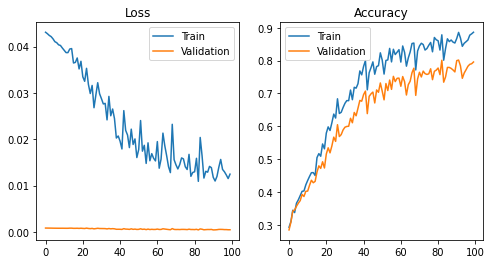

In [17]:
train_and_evaluate(lstm, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

In [18]:
class GRU(nn.Module):
    
    def __init__(self):
        super(GRU, self).__init__()

        self.gru = nn.GRU(22, 64, 3, batch_first=True, dropout=0.4)

        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )
    
    def forward(self, x, h=None):

        # GRU
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        out, _ = self.gru(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out


In [19]:
# initiate LSTM model
gru = GRU()

# create your optimizer
optimizer = optim.Adam(gru.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/6768 (0.00%)]		Loss: 1.61701
Training Progress: 	Epoch 1 [320/6768 (4.72%)]		Loss: 1.36332
Training Progress: 	Epoch 1 [640/6768 (9.43%)]		Loss: 1.42349
Training Progress: 	Epoch 1 [960/6768 (14.15%)]		Loss: 1.47050
Training Progress: 	Epoch 1 [1280/6768 (18.87%)]		Loss: 1.35153
Training Progress: 	Epoch 1 [1600/6768 (23.58%)]		Loss: 1.43636
Training Progress: 	Epoch 1 [1920/6768 (28.30%)]		Loss: 1.50179
Training Progress: 	Epoch 1 [2240/6768 (33.02%)]		Loss: 1.34796
Training Progress: 	Epoch 1 [2560/6768 (37.74%)]		Loss: 1.37872
Training Progress: 	Epoch 1 [2880/6768 (42.45%)]		Loss: 1.50042
Training Progress: 	Epoch 1 [3200/6768 (47.17%)]		Loss: 1.42771
Training Progress: 	Epoch 1 [3520/6768 (51.89%)]		Loss: 1.46220
Training Progress: 	Epoch 1 [3840/6768 (56.60%)]		Loss: 1.38592
Training Progress: 	Epoch 1 [4160/6768 (61.32%)]		Loss: 1.42766
Training Progress: 	Epoch 1 [4480/6768 (66.04%)]		Loss: 1.45746
Training Progress: 	Epoch 1 [4800/6768 (70.75%)]	

Training Progress: 	Epoch 6 [2240/6768 (33.02%)]		Loss: 1.30357
Training Progress: 	Epoch 6 [2560/6768 (37.74%)]		Loss: 1.22695
Training Progress: 	Epoch 6 [2880/6768 (42.45%)]		Loss: 1.36559
Training Progress: 	Epoch 6 [3200/6768 (47.17%)]		Loss: 1.29208
Training Progress: 	Epoch 6 [3520/6768 (51.89%)]		Loss: 1.37809
Training Progress: 	Epoch 6 [3840/6768 (56.60%)]		Loss: 1.36657
Training Progress: 	Epoch 6 [4160/6768 (61.32%)]		Loss: 1.36338
Training Progress: 	Epoch 6 [4480/6768 (66.04%)]		Loss: 1.32481
Training Progress: 	Epoch 6 [4800/6768 (70.75%)]		Loss: 1.30098
Training Progress: 	Epoch 6 [5120/6768 (75.47%)]		Loss: 1.35228
Training Progress: 	Epoch 6 [5440/6768 (80.19%)]		Loss: 1.27706
Training Progress: 	Epoch 6 [5760/6768 (84.91%)]		Loss: 1.42663
Training Progress: 	Epoch 6 [6080/6768 (89.62%)]		Loss: 1.40146
Training Progress: 	Epoch 6 [6400/6768 (94.34%)]		Loss: 1.34128
Training Progress: 	Epoch 6 [6720/6768 (99.06%)]		Loss: 1.14436
	Train loss: 0.04196, Accuracy: 2315/676

Training Progress: 	Epoch 11 [4160/6768 (61.32%)]		Loss: 1.27460
Training Progress: 	Epoch 11 [4480/6768 (66.04%)]		Loss: 1.24953
Training Progress: 	Epoch 11 [4800/6768 (70.75%)]		Loss: 1.22284
Training Progress: 	Epoch 11 [5120/6768 (75.47%)]		Loss: 1.15224
Training Progress: 	Epoch 11 [5440/6768 (80.19%)]		Loss: 1.17479
Training Progress: 	Epoch 11 [5760/6768 (84.91%)]		Loss: 1.45608
Training Progress: 	Epoch 11 [6080/6768 (89.62%)]		Loss: 1.10564
Training Progress: 	Epoch 11 [6400/6768 (94.34%)]		Loss: 1.27319
Training Progress: 	Epoch 11 [6720/6768 (99.06%)]		Loss: 0.95179
	Train loss: 0.04083, Accuracy: 2821/6768 (41.00%)
	Validation loss: 0.00080, Accuracy: 686/1692 (40.00%)
	Test loss: 0.00086, Accuracy: 543/1772 (30.00%)

Training Progress: 	Epoch 12 [0/6768 (0.00%)]		Loss: 1.14520
Training Progress: 	Epoch 12 [320/6768 (4.72%)]		Loss: 1.36199
Training Progress: 	Epoch 12 [640/6768 (9.43%)]		Loss: 1.22491
Training Progress: 	Epoch 12 [960/6768 (14.15%)]		Loss: 1.20451
Training

Training Progress: 	Epoch 16 [5760/6768 (84.91%)]		Loss: 1.09841
Training Progress: 	Epoch 16 [6080/6768 (89.62%)]		Loss: 0.92782
Training Progress: 	Epoch 16 [6400/6768 (94.34%)]		Loss: 1.09265
Training Progress: 	Epoch 16 [6720/6768 (99.06%)]		Loss: 0.91158
	Train loss: 0.03860, Accuracy: 3247/6768 (47.00%)
	Validation loss: 0.00079, Accuracy: 763/1692 (45.00%)
	Test loss: 0.00093, Accuracy: 588/1772 (33.00%)

Training Progress: 	Epoch 17 [0/6768 (0.00%)]		Loss: 0.98963
Training Progress: 	Epoch 17 [320/6768 (4.72%)]		Loss: 1.13631
Training Progress: 	Epoch 17 [640/6768 (9.43%)]		Loss: 1.15564
Training Progress: 	Epoch 17 [960/6768 (14.15%)]		Loss: 1.15446
Training Progress: 	Epoch 17 [1280/6768 (18.87%)]		Loss: 1.08535
Training Progress: 	Epoch 17 [1600/6768 (23.58%)]		Loss: 0.87435
Training Progress: 	Epoch 17 [1920/6768 (28.30%)]		Loss: 1.05345
Training Progress: 	Epoch 17 [2240/6768 (33.02%)]		Loss: 0.94566
Training Progress: 	Epoch 17 [2560/6768 (37.74%)]		Loss: 0.92126
Training

	Validation loss: 0.00075, Accuracy: 835/1692 (49.00%)
	Test loss: 0.00103, Accuracy: 549/1772 (30.00%)

Training Progress: 	Epoch 22 [0/6768 (0.00%)]		Loss: 0.76583
Training Progress: 	Epoch 22 [320/6768 (4.72%)]		Loss: 1.20750
Training Progress: 	Epoch 22 [640/6768 (9.43%)]		Loss: 1.11462
Training Progress: 	Epoch 22 [960/6768 (14.15%)]		Loss: 0.80605
Training Progress: 	Epoch 22 [1280/6768 (18.87%)]		Loss: 0.81190
Training Progress: 	Epoch 22 [1600/6768 (23.58%)]		Loss: 0.52988
Training Progress: 	Epoch 22 [1920/6768 (28.30%)]		Loss: 1.05602
Training Progress: 	Epoch 22 [2240/6768 (33.02%)]		Loss: 0.98731
Training Progress: 	Epoch 22 [2560/6768 (37.74%)]		Loss: 0.59503
Training Progress: 	Epoch 22 [2880/6768 (42.45%)]		Loss: 1.20581
Training Progress: 	Epoch 22 [3200/6768 (47.17%)]		Loss: 0.70271
Training Progress: 	Epoch 22 [3520/6768 (51.89%)]		Loss: 0.80338
Training Progress: 	Epoch 22 [3840/6768 (56.60%)]		Loss: 0.80062
Training Progress: 	Epoch 22 [4160/6768 (61.32%)]		Loss: 0.

Training Progress: 	Epoch 27 [1280/6768 (18.87%)]		Loss: 0.83851
Training Progress: 	Epoch 27 [1600/6768 (23.58%)]		Loss: 0.49384
Training Progress: 	Epoch 27 [1920/6768 (28.30%)]		Loss: 0.64829
Training Progress: 	Epoch 27 [2240/6768 (33.02%)]		Loss: 0.99598
Training Progress: 	Epoch 27 [2560/6768 (37.74%)]		Loss: 0.63213
Training Progress: 	Epoch 27 [2880/6768 (42.45%)]		Loss: 0.63769
Training Progress: 	Epoch 27 [3200/6768 (47.17%)]		Loss: 0.56403
Training Progress: 	Epoch 27 [3520/6768 (51.89%)]		Loss: 0.82808
Training Progress: 	Epoch 27 [3840/6768 (56.60%)]		Loss: 0.63535
Training Progress: 	Epoch 27 [4160/6768 (61.32%)]		Loss: 0.73235
Training Progress: 	Epoch 27 [4480/6768 (66.04%)]		Loss: 0.51843
Training Progress: 	Epoch 27 [4800/6768 (70.75%)]		Loss: 0.58460
Training Progress: 	Epoch 27 [5120/6768 (75.47%)]		Loss: 0.71169
Training Progress: 	Epoch 27 [5440/6768 (80.19%)]		Loss: 0.93018
Training Progress: 	Epoch 27 [5760/6768 (84.91%)]		Loss: 0.80573
Training Progress: 	Epoch

Training Progress: 	Epoch 32 [2880/6768 (42.45%)]		Loss: 0.57453
Training Progress: 	Epoch 32 [3200/6768 (47.17%)]		Loss: 0.43561
Training Progress: 	Epoch 32 [3520/6768 (51.89%)]		Loss: 0.66068
Training Progress: 	Epoch 32 [3840/6768 (56.60%)]		Loss: 0.64873
Training Progress: 	Epoch 32 [4160/6768 (61.32%)]		Loss: 0.66504
Training Progress: 	Epoch 32 [4480/6768 (66.04%)]		Loss: 0.54117
Training Progress: 	Epoch 32 [4800/6768 (70.75%)]		Loss: 0.52813
Training Progress: 	Epoch 32 [5120/6768 (75.47%)]		Loss: 0.70086
Training Progress: 	Epoch 32 [5440/6768 (80.19%)]		Loss: 0.62547
Training Progress: 	Epoch 32 [5760/6768 (84.91%)]		Loss: 0.51774
Training Progress: 	Epoch 32 [6080/6768 (89.62%)]		Loss: 0.44197
Training Progress: 	Epoch 32 [6400/6768 (94.34%)]		Loss: 0.73059
Training Progress: 	Epoch 32 [6720/6768 (99.06%)]		Loss: 0.44593
	Train loss: 0.02802, Accuracy: 4632/6768 (68.00%)
	Validation loss: 0.00070, Accuracy: 1033/1692 (61.00%)
	Test loss: 0.00123, Accuracy: 659/1772 (37.00%)

Training Progress: 	Epoch 37 [4480/6768 (66.04%)]		Loss: 0.23404
Training Progress: 	Epoch 37 [4800/6768 (70.75%)]		Loss: 0.26330
Training Progress: 	Epoch 37 [5120/6768 (75.47%)]		Loss: 0.49805
Training Progress: 	Epoch 37 [5440/6768 (80.19%)]		Loss: 0.44846
Training Progress: 	Epoch 37 [5760/6768 (84.91%)]		Loss: 0.38167
Training Progress: 	Epoch 37 [6080/6768 (89.62%)]		Loss: 0.44365
Training Progress: 	Epoch 37 [6400/6768 (94.34%)]		Loss: 0.47922
Training Progress: 	Epoch 37 [6720/6768 (99.06%)]		Loss: 0.27569
	Train loss: 0.03011, Accuracy: 4682/6768 (69.00%)
	Validation loss: 0.00078, Accuracy: 1031/1692 (60.00%)
	Test loss: 0.00138, Accuracy: 639/1772 (36.00%)

Training Progress: 	Epoch 38 [0/6768 (0.00%)]		Loss: 0.46819
Training Progress: 	Epoch 38 [320/6768 (4.72%)]		Loss: 0.65417
Training Progress: 	Epoch 38 [640/6768 (9.43%)]		Loss: 0.41532
Training Progress: 	Epoch 38 [960/6768 (14.15%)]		Loss: 0.52571
Training Progress: 	Epoch 38 [1280/6768 (18.87%)]		Loss: 0.43501
Trainin

Training Progress: 	Epoch 42 [6080/6768 (89.62%)]		Loss: 0.41025
Training Progress: 	Epoch 42 [6400/6768 (94.34%)]		Loss: 0.61278
Training Progress: 	Epoch 42 [6720/6768 (99.06%)]		Loss: 0.13002
	Train loss: 0.02951, Accuracy: 4769/6768 (70.00%)
	Validation loss: 0.00077, Accuracy: 1067/1692 (63.00%)
	Test loss: 0.00148, Accuracy: 656/1772 (37.00%)

Training Progress: 	Epoch 43 [0/6768 (0.00%)]		Loss: 0.49730
Training Progress: 	Epoch 43 [320/6768 (4.72%)]		Loss: 0.36515
Training Progress: 	Epoch 43 [640/6768 (9.43%)]		Loss: 0.51583
Training Progress: 	Epoch 43 [960/6768 (14.15%)]		Loss: 0.20608
Training Progress: 	Epoch 43 [1280/6768 (18.87%)]		Loss: 0.35003
Training Progress: 	Epoch 43 [1600/6768 (23.58%)]		Loss: 0.16427
Training Progress: 	Epoch 43 [1920/6768 (28.30%)]		Loss: 0.20534
Training Progress: 	Epoch 43 [2240/6768 (33.02%)]		Loss: 0.20710
Training Progress: 	Epoch 43 [2560/6768 (37.74%)]		Loss: 0.24971
Training Progress: 	Epoch 43 [2880/6768 (42.45%)]		Loss: 0.37799
Trainin

Training Progress: 	Epoch 48 [0/6768 (0.00%)]		Loss: 0.49111
Training Progress: 	Epoch 48 [320/6768 (4.72%)]		Loss: 0.33719
Training Progress: 	Epoch 48 [640/6768 (9.43%)]		Loss: 0.44923
Training Progress: 	Epoch 48 [960/6768 (14.15%)]		Loss: 0.21714
Training Progress: 	Epoch 48 [1280/6768 (18.87%)]		Loss: 0.18721
Training Progress: 	Epoch 48 [1600/6768 (23.58%)]		Loss: 0.28798
Training Progress: 	Epoch 48 [1920/6768 (28.30%)]		Loss: 0.30099
Training Progress: 	Epoch 48 [2240/6768 (33.02%)]		Loss: 0.28233
Training Progress: 	Epoch 48 [2560/6768 (37.74%)]		Loss: 0.35417
Training Progress: 	Epoch 48 [2880/6768 (42.45%)]		Loss: 0.52675
Training Progress: 	Epoch 48 [3200/6768 (47.17%)]		Loss: 0.20985
Training Progress: 	Epoch 48 [3520/6768 (51.89%)]		Loss: 0.23257
Training Progress: 	Epoch 48 [3840/6768 (56.60%)]		Loss: 0.26942
Training Progress: 	Epoch 48 [4160/6768 (61.32%)]		Loss: 0.24132
Training Progress: 	Epoch 48 [4480/6768 (66.04%)]		Loss: 0.26652
Training Progress: 	Epoch 48 [4800

Training Progress: 	Epoch 53 [1600/6768 (23.58%)]		Loss: 0.14419
Training Progress: 	Epoch 53 [1920/6768 (28.30%)]		Loss: 0.28716
Training Progress: 	Epoch 53 [2240/6768 (33.02%)]		Loss: 0.24268
Training Progress: 	Epoch 53 [2560/6768 (37.74%)]		Loss: 0.14989
Training Progress: 	Epoch 53 [2880/6768 (42.45%)]		Loss: 0.45854
Training Progress: 	Epoch 53 [3200/6768 (47.17%)]		Loss: 0.11746
Training Progress: 	Epoch 53 [3520/6768 (51.89%)]		Loss: 0.38390
Training Progress: 	Epoch 53 [3840/6768 (56.60%)]		Loss: 0.10836
Training Progress: 	Epoch 53 [4160/6768 (61.32%)]		Loss: 0.37021
Training Progress: 	Epoch 53 [4480/6768 (66.04%)]		Loss: 0.16248
Training Progress: 	Epoch 53 [4800/6768 (70.75%)]		Loss: 0.08541
Training Progress: 	Epoch 53 [5120/6768 (75.47%)]		Loss: 0.23621
Training Progress: 	Epoch 53 [5440/6768 (80.19%)]		Loss: 0.24174
Training Progress: 	Epoch 53 [5760/6768 (84.91%)]		Loss: 0.24896
Training Progress: 	Epoch 53 [6080/6768 (89.62%)]		Loss: 0.31438
Training Progress: 	Epoch

Training Progress: 	Epoch 58 [3200/6768 (47.17%)]		Loss: 0.10440
Training Progress: 	Epoch 58 [3520/6768 (51.89%)]		Loss: 0.30265
Training Progress: 	Epoch 58 [3840/6768 (56.60%)]		Loss: 0.25610
Training Progress: 	Epoch 58 [4160/6768 (61.32%)]		Loss: 0.16828
Training Progress: 	Epoch 58 [4480/6768 (66.04%)]		Loss: 0.19582
Training Progress: 	Epoch 58 [4800/6768 (70.75%)]		Loss: 0.25274
Training Progress: 	Epoch 58 [5120/6768 (75.47%)]		Loss: 0.11726
Training Progress: 	Epoch 58 [5440/6768 (80.19%)]		Loss: 0.52153
Training Progress: 	Epoch 58 [5760/6768 (84.91%)]		Loss: 0.41395
Training Progress: 	Epoch 58 [6080/6768 (89.62%)]		Loss: 0.16201
Training Progress: 	Epoch 58 [6400/6768 (94.34%)]		Loss: 0.35060
Training Progress: 	Epoch 58 [6720/6768 (99.06%)]		Loss: 0.15403
	Train loss: 0.01755, Accuracy: 5573/6768 (82.00%)
	Validation loss: 0.00055, Accuracy: 1231/1692 (72.00%)
	Test loss: 0.00157, Accuracy: 725/1772 (40.00%)

Training Progress: 	Epoch 59 [0/6768 (0.00%)]		Loss: 0.59962
Tr

Training Progress: 	Epoch 63 [4800/6768 (70.75%)]		Loss: 0.25464
Training Progress: 	Epoch 63 [5120/6768 (75.47%)]		Loss: 0.15972
Training Progress: 	Epoch 63 [5440/6768 (80.19%)]		Loss: 0.20260
Training Progress: 	Epoch 63 [5760/6768 (84.91%)]		Loss: 0.18449
Training Progress: 	Epoch 63 [6080/6768 (89.62%)]		Loss: 0.21797
Training Progress: 	Epoch 63 [6400/6768 (94.34%)]		Loss: 0.37644
Training Progress: 	Epoch 63 [6720/6768 (99.06%)]		Loss: 0.45870
	Train loss: 0.02949, Accuracy: 4986/6768 (73.00%)
	Validation loss: 0.00085, Accuracy: 1104/1692 (65.00%)
	Test loss: 0.00186, Accuracy: 688/1772 (38.00%)

Training Progress: 	Epoch 64 [0/6768 (0.00%)]		Loss: 0.49565
Training Progress: 	Epoch 64 [320/6768 (4.72%)]		Loss: 0.28470
Training Progress: 	Epoch 64 [640/6768 (9.43%)]		Loss: 0.26413
Training Progress: 	Epoch 64 [960/6768 (14.15%)]		Loss: 0.11708
Training Progress: 	Epoch 64 [1280/6768 (18.87%)]		Loss: 0.26862
Training Progress: 	Epoch 64 [1600/6768 (23.58%)]		Loss: 0.04511
Trainin

Training Progress: 	Epoch 68 [6400/6768 (94.34%)]		Loss: 0.33769
Training Progress: 	Epoch 68 [6720/6768 (99.06%)]		Loss: 0.18267
	Train loss: 0.02267, Accuracy: 5362/6768 (79.00%)
	Validation loss: 0.00067, Accuracy: 1190/1692 (70.00%)
	Test loss: 0.00176, Accuracy: 681/1772 (38.00%)

Training Progress: 	Epoch 69 [0/6768 (0.00%)]		Loss: 0.44891
Training Progress: 	Epoch 69 [320/6768 (4.72%)]		Loss: 0.06868
Training Progress: 	Epoch 69 [640/6768 (9.43%)]		Loss: 0.13287
Training Progress: 	Epoch 69 [960/6768 (14.15%)]		Loss: 0.03928
Training Progress: 	Epoch 69 [1280/6768 (18.87%)]		Loss: 0.25318
Training Progress: 	Epoch 69 [1600/6768 (23.58%)]		Loss: 0.09885
Training Progress: 	Epoch 69 [1920/6768 (28.30%)]		Loss: 0.16951
Training Progress: 	Epoch 69 [2240/6768 (33.02%)]		Loss: 0.14742
Training Progress: 	Epoch 69 [2560/6768 (37.74%)]		Loss: 0.18647
Training Progress: 	Epoch 69 [2880/6768 (42.45%)]		Loss: 0.20458
Training Progress: 	Epoch 69 [3200/6768 (47.17%)]		Loss: 0.06457
Trainin

Training Progress: 	Epoch 74 [320/6768 (4.72%)]		Loss: 0.25428
Training Progress: 	Epoch 74 [640/6768 (9.43%)]		Loss: 0.36649
Training Progress: 	Epoch 74 [960/6768 (14.15%)]		Loss: 0.06713
Training Progress: 	Epoch 74 [1280/6768 (18.87%)]		Loss: 0.13598
Training Progress: 	Epoch 74 [1600/6768 (23.58%)]		Loss: 0.04189
Training Progress: 	Epoch 74 [1920/6768 (28.30%)]		Loss: 0.18772
Training Progress: 	Epoch 74 [2240/6768 (33.02%)]		Loss: 0.07470
Training Progress: 	Epoch 74 [2560/6768 (37.74%)]		Loss: 0.17468
Training Progress: 	Epoch 74 [2880/6768 (42.45%)]		Loss: 0.15037
Training Progress: 	Epoch 74 [3200/6768 (47.17%)]		Loss: 0.14853
Training Progress: 	Epoch 74 [3520/6768 (51.89%)]		Loss: 0.24698
Training Progress: 	Epoch 74 [3840/6768 (56.60%)]		Loss: 0.08473
Training Progress: 	Epoch 74 [4160/6768 (61.32%)]		Loss: 0.14528
Training Progress: 	Epoch 74 [4480/6768 (66.04%)]		Loss: 0.10657
Training Progress: 	Epoch 74 [4800/6768 (70.75%)]		Loss: 0.06212
Training Progress: 	Epoch 74 [

Training Progress: 	Epoch 79 [1920/6768 (28.30%)]		Loss: 0.11322
Training Progress: 	Epoch 79 [2240/6768 (33.02%)]		Loss: 0.13698
Training Progress: 	Epoch 79 [2560/6768 (37.74%)]		Loss: 0.17017
Training Progress: 	Epoch 79 [2880/6768 (42.45%)]		Loss: 0.14120
Training Progress: 	Epoch 79 [3200/6768 (47.17%)]		Loss: 0.26387
Training Progress: 	Epoch 79 [3520/6768 (51.89%)]		Loss: 0.15409
Training Progress: 	Epoch 79 [3840/6768 (56.60%)]		Loss: 0.10995
Training Progress: 	Epoch 79 [4160/6768 (61.32%)]		Loss: 0.25015
Training Progress: 	Epoch 79 [4480/6768 (66.04%)]		Loss: 0.04191
Training Progress: 	Epoch 79 [4800/6768 (70.75%)]		Loss: 0.09340
Training Progress: 	Epoch 79 [5120/6768 (75.47%)]		Loss: 0.26263
Training Progress: 	Epoch 79 [5440/6768 (80.19%)]		Loss: 0.09968
Training Progress: 	Epoch 79 [5760/6768 (84.91%)]		Loss: 0.14198
Training Progress: 	Epoch 79 [6080/6768 (89.62%)]		Loss: 0.17475
Training Progress: 	Epoch 79 [6400/6768 (94.34%)]		Loss: 0.17814
Training Progress: 	Epoch

Training Progress: 	Epoch 84 [3520/6768 (51.89%)]		Loss: 0.24614
Training Progress: 	Epoch 84 [3840/6768 (56.60%)]		Loss: 0.22558
Training Progress: 	Epoch 84 [4160/6768 (61.32%)]		Loss: 0.28303
Training Progress: 	Epoch 84 [4480/6768 (66.04%)]		Loss: 0.15432
Training Progress: 	Epoch 84 [4800/6768 (70.75%)]		Loss: 0.09444
Training Progress: 	Epoch 84 [5120/6768 (75.47%)]		Loss: 0.43383
Training Progress: 	Epoch 84 [5440/6768 (80.19%)]		Loss: 0.23886
Training Progress: 	Epoch 84 [5760/6768 (84.91%)]		Loss: 0.10719
Training Progress: 	Epoch 84 [6080/6768 (89.62%)]		Loss: 0.10676
Training Progress: 	Epoch 84 [6400/6768 (94.34%)]		Loss: 0.16356
Training Progress: 	Epoch 84 [6720/6768 (99.06%)]		Loss: 0.04025
	Train loss: 0.02082, Accuracy: 5486/6768 (81.00%)
	Validation loss: 0.00065, Accuracy: 1234/1692 (72.00%)
	Test loss: 0.00194, Accuracy: 699/1772 (39.00%)

Training Progress: 	Epoch 85 [0/6768 (0.00%)]		Loss: 0.38097
Training Progress: 	Epoch 85 [320/6768 (4.72%)]		Loss: 0.20545
Trai

Training Progress: 	Epoch 89 [5120/6768 (75.47%)]		Loss: 0.17545
Training Progress: 	Epoch 89 [5440/6768 (80.19%)]		Loss: 0.33594
Training Progress: 	Epoch 89 [5760/6768 (84.91%)]		Loss: 0.06727
Training Progress: 	Epoch 89 [6080/6768 (89.62%)]		Loss: 0.09223
Training Progress: 	Epoch 89 [6400/6768 (94.34%)]		Loss: 0.18005
Training Progress: 	Epoch 89 [6720/6768 (99.06%)]		Loss: 0.17874
	Train loss: 0.02943, Accuracy: 5238/6768 (77.00%)
	Validation loss: 0.00086, Accuracy: 1151/1692 (68.00%)
	Test loss: 0.00220, Accuracy: 668/1772 (37.00%)

Training Progress: 	Epoch 90 [0/6768 (0.00%)]		Loss: 0.20638
Training Progress: 	Epoch 90 [320/6768 (4.72%)]		Loss: 0.10900
Training Progress: 	Epoch 90 [640/6768 (9.43%)]		Loss: 0.03591
Training Progress: 	Epoch 90 [960/6768 (14.15%)]		Loss: 0.24564
Training Progress: 	Epoch 90 [1280/6768 (18.87%)]		Loss: 0.11289
Training Progress: 	Epoch 90 [1600/6768 (23.58%)]		Loss: 0.06945
Training Progress: 	Epoch 90 [1920/6768 (28.30%)]		Loss: 0.08106
Trainin

Training Progress: 	Epoch 94 [6720/6768 (99.06%)]		Loss: 0.08422
	Train loss: 0.02059, Accuracy: 5673/6768 (83.00%)
	Validation loss: 0.00063, Accuracy: 1292/1692 (76.00%)
	Test loss: 0.00194, Accuracy: 720/1772 (40.00%)

Training Progress: 	Epoch 95 [0/6768 (0.00%)]		Loss: 0.40080
Training Progress: 	Epoch 95 [320/6768 (4.72%)]		Loss: 0.16652
Training Progress: 	Epoch 95 [640/6768 (9.43%)]		Loss: 0.26865
Training Progress: 	Epoch 95 [960/6768 (14.15%)]		Loss: 0.21446
Training Progress: 	Epoch 95 [1280/6768 (18.87%)]		Loss: 0.02222
Training Progress: 	Epoch 95 [1600/6768 (23.58%)]		Loss: 0.05673
Training Progress: 	Epoch 95 [1920/6768 (28.30%)]		Loss: 0.10948
Training Progress: 	Epoch 95 [2240/6768 (33.02%)]		Loss: 0.06328
Training Progress: 	Epoch 95 [2560/6768 (37.74%)]		Loss: 0.12273
Training Progress: 	Epoch 95 [2880/6768 (42.45%)]		Loss: 0.02470
Training Progress: 	Epoch 95 [3200/6768 (47.17%)]		Loss: 0.06199
Training Progress: 	Epoch 95 [3520/6768 (51.89%)]		Loss: 0.09973
Trainin

Training Progress: 	Epoch 100 [640/6768 (9.43%)]		Loss: 0.07209
Training Progress: 	Epoch 100 [960/6768 (14.15%)]		Loss: 0.16742
Training Progress: 	Epoch 100 [1280/6768 (18.87%)]		Loss: 0.05213
Training Progress: 	Epoch 100 [1600/6768 (23.58%)]		Loss: 0.02984
Training Progress: 	Epoch 100 [1920/6768 (28.30%)]		Loss: 0.15736
Training Progress: 	Epoch 100 [2240/6768 (33.02%)]		Loss: 0.19429
Training Progress: 	Epoch 100 [2560/6768 (37.74%)]		Loss: 0.02379
Training Progress: 	Epoch 100 [2880/6768 (42.45%)]		Loss: 0.13899
Training Progress: 	Epoch 100 [3200/6768 (47.17%)]		Loss: 0.11065
Training Progress: 	Epoch 100 [3520/6768 (51.89%)]		Loss: 0.09170
Training Progress: 	Epoch 100 [3840/6768 (56.60%)]		Loss: 0.30002
Training Progress: 	Epoch 100 [4160/6768 (61.32%)]		Loss: 0.07556
Training Progress: 	Epoch 100 [4480/6768 (66.04%)]		Loss: 0.09697
Training Progress: 	Epoch 100 [4800/6768 (70.75%)]		Loss: 0.13692
Training Progress: 	Epoch 100 [5120/6768 (75.47%)]		Loss: 0.07852
Training Prog

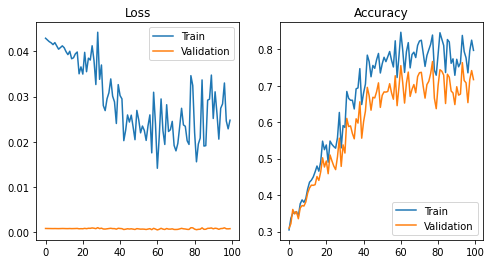

In [20]:
train_and_evaluate(gru, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN+LSTM

In [8]:
class Permute(nn.Module):
    def forward(self, x):
        return x.permute(0, 2, 1, 3)
    
class CNN_LSTM(nn.Module):
    
    def __init__(self):
        super(CNN_LSTM, self).__init__()

        self.conv1 = nn.Conv2d(22, 25, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool1 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(1, 0))
        self.bn1 = nn.BatchNorm2d(25)
        self.dropout = nn.Dropout2d(p=0.5)

        self.conv2 = nn.Conv2d(25, 50, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool2 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(0, 0))
        self.bn2 = nn.BatchNorm2d(50)

        self.conv3 = nn.Conv2d(50, 100, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool3 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(0, 0))
        self.bn3 = nn.BatchNorm2d(100)

        self.conv4 = nn.Conv2d(100, 200, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool4 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(1, 0))
        self.bn4 = nn.BatchNorm2d(200)
        
        
        
        self.lstm = nn.LSTM(4, 64, 3, batch_first=True, dropout=0.4)
        
        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )

        

    
    def forward(self, x):
        
        # CNN
        x = x.permute(0,1,3,2)
        x = self.dropout(self.bn1(self.pool1(F.elu(self.conv1(x)))))
        x = self.dropout(self.bn2(self.pool2(F.elu(self.conv2(x)))))
        x = self.dropout(self.bn3(self.pool3(F.elu(self.conv3(x)))))
        x = self.dropout(self.bn4(self.pool4(F.elu(self.conv4(x)))))

        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, H).permute(0, 1, 2)
        out, _ = self.lstm(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

In [9]:
# initiate LSTM model
cnn_lstm = CNN_LSTM()

# create your optimizer
optimizer = optim.Adam(cnn_lstm.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/6768 (0.00%)]		Loss: 1.43890
Training Progress: 	Epoch 1 [320/6768 (4.72%)]		Loss: 1.46004
Training Progress: 	Epoch 1 [640/6768 (9.43%)]		Loss: 1.35402
Training Progress: 	Epoch 1 [960/6768 (14.15%)]		Loss: 1.39963
Training Progress: 	Epoch 1 [1280/6768 (18.87%)]		Loss: 1.45418
Training Progress: 	Epoch 1 [1600/6768 (23.58%)]		Loss: 1.46258
Training Progress: 	Epoch 1 [1920/6768 (28.30%)]		Loss: 1.41949
Training Progress: 	Epoch 1 [2240/6768 (33.02%)]		Loss: 1.42676
Training Progress: 	Epoch 1 [2560/6768 (37.74%)]		Loss: 1.41432
Training Progress: 	Epoch 1 [2880/6768 (42.45%)]		Loss: 1.41545
Training Progress: 	Epoch 1 [3200/6768 (47.17%)]		Loss: 1.45960
Training Progress: 	Epoch 1 [3520/6768 (51.89%)]		Loss: 1.40389
Training Progress: 	Epoch 1 [3840/6768 (56.60%)]		Loss: 1.37963
Training Progress: 	Epoch 1 [4160/6768 (61.32%)]		Loss: 1.38618
Training Progress: 	Epoch 1 [4480/6768 (66.04%)]		Loss: 1.41861
Training Progress: 	Epoch 1 [4800/6768 (70.75%)]	

Training Progress: 	Epoch 6 [2240/6768 (33.02%)]		Loss: 1.16684
Training Progress: 	Epoch 6 [2560/6768 (37.74%)]		Loss: 1.12466
Training Progress: 	Epoch 6 [2880/6768 (42.45%)]		Loss: 1.19617
Training Progress: 	Epoch 6 [3200/6768 (47.17%)]		Loss: 1.05129
Training Progress: 	Epoch 6 [3520/6768 (51.89%)]		Loss: 1.20395
Training Progress: 	Epoch 6 [3840/6768 (56.60%)]		Loss: 0.92148
Training Progress: 	Epoch 6 [4160/6768 (61.32%)]		Loss: 1.18230
Training Progress: 	Epoch 6 [4480/6768 (66.04%)]		Loss: 1.11447
Training Progress: 	Epoch 6 [4800/6768 (70.75%)]		Loss: 1.26930
Training Progress: 	Epoch 6 [5120/6768 (75.47%)]		Loss: 1.39789
Training Progress: 	Epoch 6 [5440/6768 (80.19%)]		Loss: 1.38619
Training Progress: 	Epoch 6 [5760/6768 (84.91%)]		Loss: 1.17461
Training Progress: 	Epoch 6 [6080/6768 (89.62%)]		Loss: 1.38201
Training Progress: 	Epoch 6 [6400/6768 (94.34%)]		Loss: 1.22048
Training Progress: 	Epoch 6 [6720/6768 (99.06%)]		Loss: 1.27449
	Train loss: 0.03644, Accuracy: 3185/676

Training Progress: 	Epoch 11 [4160/6768 (61.32%)]		Loss: 1.19978
Training Progress: 	Epoch 11 [4480/6768 (66.04%)]		Loss: 1.04955
Training Progress: 	Epoch 11 [4800/6768 (70.75%)]		Loss: 1.10988
Training Progress: 	Epoch 11 [5120/6768 (75.47%)]		Loss: 1.08610
Training Progress: 	Epoch 11 [5440/6768 (80.19%)]		Loss: 1.31067
Training Progress: 	Epoch 11 [5760/6768 (84.91%)]		Loss: 1.12385
Training Progress: 	Epoch 11 [6080/6768 (89.62%)]		Loss: 1.17605
Training Progress: 	Epoch 11 [6400/6768 (94.34%)]		Loss: 1.03073
Training Progress: 	Epoch 11 [6720/6768 (99.06%)]		Loss: 1.13496
	Train loss: 0.03573, Accuracy: 3323/6768 (49.00%)
	Validation loss: 0.00069, Accuracy: 786/1692 (46.00%)
	Test loss: 0.00069, Accuracy: 750/1772 (42.00%)

Training Progress: 	Epoch 12 [0/6768 (0.00%)]		Loss: 1.04491
Training Progress: 	Epoch 12 [320/6768 (4.72%)]		Loss: 1.09974
Training Progress: 	Epoch 12 [640/6768 (9.43%)]		Loss: 1.16142
Training Progress: 	Epoch 12 [960/6768 (14.15%)]		Loss: 1.00607
Training

Training Progress: 	Epoch 16 [5760/6768 (84.91%)]		Loss: 0.95908
Training Progress: 	Epoch 16 [6080/6768 (89.62%)]		Loss: 1.14305
Training Progress: 	Epoch 16 [6400/6768 (94.34%)]		Loss: 1.17313
Training Progress: 	Epoch 16 [6720/6768 (99.06%)]		Loss: 0.94654
	Train loss: 0.03365, Accuracy: 3562/6768 (52.00%)
	Validation loss: 0.00066, Accuracy: 835/1692 (49.00%)
	Test loss: 0.00069, Accuracy: 789/1772 (44.00%)

Training Progress: 	Epoch 17 [0/6768 (0.00%)]		Loss: 1.00551
Training Progress: 	Epoch 17 [320/6768 (4.72%)]		Loss: 1.17229
Training Progress: 	Epoch 17 [640/6768 (9.43%)]		Loss: 1.16889
Training Progress: 	Epoch 17 [960/6768 (14.15%)]		Loss: 0.98438
Training Progress: 	Epoch 17 [1280/6768 (18.87%)]		Loss: 0.97381
Training Progress: 	Epoch 17 [1600/6768 (23.58%)]		Loss: 0.87251
Training Progress: 	Epoch 17 [1920/6768 (28.30%)]		Loss: 1.21861
Training Progress: 	Epoch 17 [2240/6768 (33.02%)]		Loss: 1.00836
Training Progress: 	Epoch 17 [2560/6768 (37.74%)]		Loss: 0.91296
Training

	Validation loss: 0.00060, Accuracy: 924/1692 (54.00%)
	Test loss: 0.00066, Accuracy: 832/1772 (46.00%)

Training Progress: 	Epoch 22 [0/6768 (0.00%)]		Loss: 1.04327
Training Progress: 	Epoch 22 [320/6768 (4.72%)]		Loss: 1.02833
Training Progress: 	Epoch 22 [640/6768 (9.43%)]		Loss: 1.16613
Training Progress: 	Epoch 22 [960/6768 (14.15%)]		Loss: 0.96660
Training Progress: 	Epoch 22 [1280/6768 (18.87%)]		Loss: 0.92047
Training Progress: 	Epoch 22 [1600/6768 (23.58%)]		Loss: 0.90716
Training Progress: 	Epoch 22 [1920/6768 (28.30%)]		Loss: 1.08569
Training Progress: 	Epoch 22 [2240/6768 (33.02%)]		Loss: 0.79247
Training Progress: 	Epoch 22 [2560/6768 (37.74%)]		Loss: 0.97125
Training Progress: 	Epoch 22 [2880/6768 (42.45%)]		Loss: 1.06635
Training Progress: 	Epoch 22 [3200/6768 (47.17%)]		Loss: 0.80417
Training Progress: 	Epoch 22 [3520/6768 (51.89%)]		Loss: 0.90239
Training Progress: 	Epoch 22 [3840/6768 (56.60%)]		Loss: 0.78663
Training Progress: 	Epoch 22 [4160/6768 (61.32%)]		Loss: 0.

Training Progress: 	Epoch 27 [1280/6768 (18.87%)]		Loss: 1.03501
Training Progress: 	Epoch 27 [1600/6768 (23.58%)]		Loss: 0.79594
Training Progress: 	Epoch 27 [1920/6768 (28.30%)]		Loss: 0.94959
Training Progress: 	Epoch 27 [2240/6768 (33.02%)]		Loss: 0.87544
Training Progress: 	Epoch 27 [2560/6768 (37.74%)]		Loss: 0.72062
Training Progress: 	Epoch 27 [2880/6768 (42.45%)]		Loss: 0.93612
Training Progress: 	Epoch 27 [3200/6768 (47.17%)]		Loss: 0.85424
Training Progress: 	Epoch 27 [3520/6768 (51.89%)]		Loss: 0.82892
Training Progress: 	Epoch 27 [3840/6768 (56.60%)]		Loss: 0.74898
Training Progress: 	Epoch 27 [4160/6768 (61.32%)]		Loss: 0.93914
Training Progress: 	Epoch 27 [4480/6768 (66.04%)]		Loss: 0.86934
Training Progress: 	Epoch 27 [4800/6768 (70.75%)]		Loss: 1.00825
Training Progress: 	Epoch 27 [5120/6768 (75.47%)]		Loss: 0.91566
Training Progress: 	Epoch 27 [5440/6768 (80.19%)]		Loss: 0.93198
Training Progress: 	Epoch 27 [5760/6768 (84.91%)]		Loss: 0.87774
Training Progress: 	Epoch

Training Progress: 	Epoch 32 [2880/6768 (42.45%)]		Loss: 0.68484
Training Progress: 	Epoch 32 [3200/6768 (47.17%)]		Loss: 0.91170
Training Progress: 	Epoch 32 [3520/6768 (51.89%)]		Loss: 0.86495
Training Progress: 	Epoch 32 [3840/6768 (56.60%)]		Loss: 0.71780
Training Progress: 	Epoch 32 [4160/6768 (61.32%)]		Loss: 1.04383
Training Progress: 	Epoch 32 [4480/6768 (66.04%)]		Loss: 0.81520
Training Progress: 	Epoch 32 [4800/6768 (70.75%)]		Loss: 0.97593
Training Progress: 	Epoch 32 [5120/6768 (75.47%)]		Loss: 0.84936
Training Progress: 	Epoch 32 [5440/6768 (80.19%)]		Loss: 1.32249
Training Progress: 	Epoch 32 [5760/6768 (84.91%)]		Loss: 0.85521
Training Progress: 	Epoch 32 [6080/6768 (89.62%)]		Loss: 0.98268
Training Progress: 	Epoch 32 [6400/6768 (94.34%)]		Loss: 0.70125
Training Progress: 	Epoch 32 [6720/6768 (99.06%)]		Loss: 1.29430
	Train loss: 0.02883, Accuracy: 4012/6768 (59.00%)
	Validation loss: 0.00058, Accuracy: 956/1692 (56.00%)
	Test loss: 0.00069, Accuracy: 791/1772 (44.00%)


Training Progress: 	Epoch 37 [4480/6768 (66.04%)]		Loss: 1.09835
Training Progress: 	Epoch 37 [4800/6768 (70.75%)]		Loss: 0.84595
Training Progress: 	Epoch 37 [5120/6768 (75.47%)]		Loss: 0.90211
Training Progress: 	Epoch 37 [5440/6768 (80.19%)]		Loss: 1.03137
Training Progress: 	Epoch 37 [5760/6768 (84.91%)]		Loss: 0.75445
Training Progress: 	Epoch 37 [6080/6768 (89.62%)]		Loss: 0.82159
Training Progress: 	Epoch 37 [6400/6768 (94.34%)]		Loss: 0.61381
Training Progress: 	Epoch 37 [6720/6768 (99.06%)]		Loss: 0.91924
	Train loss: 0.02747, Accuracy: 4220/6768 (62.00%)
	Validation loss: 0.00057, Accuracy: 983/1692 (58.00%)
	Test loss: 0.00071, Accuracy: 791/1772 (44.00%)

Training Progress: 	Epoch 38 [0/6768 (0.00%)]		Loss: 0.76203
Training Progress: 	Epoch 38 [320/6768 (4.72%)]		Loss: 0.93057
Training Progress: 	Epoch 38 [640/6768 (9.43%)]		Loss: 0.78765
Training Progress: 	Epoch 38 [960/6768 (14.15%)]		Loss: 0.75493
Training Progress: 	Epoch 38 [1280/6768 (18.87%)]		Loss: 0.95186
Training

Training Progress: 	Epoch 42 [6080/6768 (89.62%)]		Loss: 0.94697
Training Progress: 	Epoch 42 [6400/6768 (94.34%)]		Loss: 0.72022
Training Progress: 	Epoch 42 [6720/6768 (99.06%)]		Loss: 0.80825
	Train loss: 0.02547, Accuracy: 4326/6768 (63.00%)
	Validation loss: 0.00053, Accuracy: 1022/1692 (60.00%)
	Test loss: 0.00070, Accuracy: 828/1772 (46.00%)

Training Progress: 	Epoch 43 [0/6768 (0.00%)]		Loss: 0.83045
Training Progress: 	Epoch 43 [320/6768 (4.72%)]		Loss: 0.89806
Training Progress: 	Epoch 43 [640/6768 (9.43%)]		Loss: 0.95353
Training Progress: 	Epoch 43 [960/6768 (14.15%)]		Loss: 0.81282
Training Progress: 	Epoch 43 [1280/6768 (18.87%)]		Loss: 0.85829
Training Progress: 	Epoch 43 [1600/6768 (23.58%)]		Loss: 0.54561
Training Progress: 	Epoch 43 [1920/6768 (28.30%)]		Loss: 0.55546
Training Progress: 	Epoch 43 [2240/6768 (33.02%)]		Loss: 0.88668
Training Progress: 	Epoch 43 [2560/6768 (37.74%)]		Loss: 0.59114
Training Progress: 	Epoch 43 [2880/6768 (42.45%)]		Loss: 0.65952
Trainin

Training Progress: 	Epoch 48 [0/6768 (0.00%)]		Loss: 0.71075
Training Progress: 	Epoch 48 [320/6768 (4.72%)]		Loss: 0.99317
Training Progress: 	Epoch 48 [640/6768 (9.43%)]		Loss: 0.63430
Training Progress: 	Epoch 48 [960/6768 (14.15%)]		Loss: 0.72822
Training Progress: 	Epoch 48 [1280/6768 (18.87%)]		Loss: 1.10761
Training Progress: 	Epoch 48 [1600/6768 (23.58%)]		Loss: 0.39535
Training Progress: 	Epoch 48 [1920/6768 (28.30%)]		Loss: 0.84098
Training Progress: 	Epoch 48 [2240/6768 (33.02%)]		Loss: 0.61215
Training Progress: 	Epoch 48 [2560/6768 (37.74%)]		Loss: 0.65909
Training Progress: 	Epoch 48 [2880/6768 (42.45%)]		Loss: 0.92523
Training Progress: 	Epoch 48 [3200/6768 (47.17%)]		Loss: 0.61541
Training Progress: 	Epoch 48 [3520/6768 (51.89%)]		Loss: 0.77943
Training Progress: 	Epoch 48 [3840/6768 (56.60%)]		Loss: 0.57832
Training Progress: 	Epoch 48 [4160/6768 (61.32%)]		Loss: 0.83113
Training Progress: 	Epoch 48 [4480/6768 (66.04%)]		Loss: 0.71749
Training Progress: 	Epoch 48 [4800

Training Progress: 	Epoch 53 [1600/6768 (23.58%)]		Loss: 0.65749
Training Progress: 	Epoch 53 [1920/6768 (28.30%)]		Loss: 0.71394
Training Progress: 	Epoch 53 [2240/6768 (33.02%)]		Loss: 0.60746
Training Progress: 	Epoch 53 [2560/6768 (37.74%)]		Loss: 0.67083
Training Progress: 	Epoch 53 [2880/6768 (42.45%)]		Loss: 0.83148
Training Progress: 	Epoch 53 [3200/6768 (47.17%)]		Loss: 0.76786
Training Progress: 	Epoch 53 [3520/6768 (51.89%)]		Loss: 0.71380
Training Progress: 	Epoch 53 [3840/6768 (56.60%)]		Loss: 0.71384
Training Progress: 	Epoch 53 [4160/6768 (61.32%)]		Loss: 0.81836
Training Progress: 	Epoch 53 [4480/6768 (66.04%)]		Loss: 0.63256
Training Progress: 	Epoch 53 [4800/6768 (70.75%)]		Loss: 0.63364
Training Progress: 	Epoch 53 [5120/6768 (75.47%)]		Loss: 0.71004
Training Progress: 	Epoch 53 [5440/6768 (80.19%)]		Loss: 0.79624
Training Progress: 	Epoch 53 [5760/6768 (84.91%)]		Loss: 0.66218
Training Progress: 	Epoch 53 [6080/6768 (89.62%)]		Loss: 0.69349
Training Progress: 	Epoch

Training Progress: 	Epoch 58 [3200/6768 (47.17%)]		Loss: 0.90653
Training Progress: 	Epoch 58 [3520/6768 (51.89%)]		Loss: 0.76379
Training Progress: 	Epoch 58 [3840/6768 (56.60%)]		Loss: 0.64738
Training Progress: 	Epoch 58 [4160/6768 (61.32%)]		Loss: 0.73960
Training Progress: 	Epoch 58 [4480/6768 (66.04%)]		Loss: 0.83170
Training Progress: 	Epoch 58 [4800/6768 (70.75%)]		Loss: 0.57645
Training Progress: 	Epoch 58 [5120/6768 (75.47%)]		Loss: 0.69140
Training Progress: 	Epoch 58 [5440/6768 (80.19%)]		Loss: 1.03388
Training Progress: 	Epoch 58 [5760/6768 (84.91%)]		Loss: 0.71776
Training Progress: 	Epoch 58 [6080/6768 (89.62%)]		Loss: 0.75442
Training Progress: 	Epoch 58 [6400/6768 (94.34%)]		Loss: 0.69783
Training Progress: 	Epoch 58 [6720/6768 (99.06%)]		Loss: 0.79182
	Train loss: 0.02551, Accuracy: 4463/6768 (65.00%)
	Validation loss: 0.00054, Accuracy: 1049/1692 (61.00%)
	Test loss: 0.00077, Accuracy: 749/1772 (42.00%)

Training Progress: 	Epoch 59 [0/6768 (0.00%)]		Loss: 0.66136
Tr

Training Progress: 	Epoch 63 [4800/6768 (70.75%)]		Loss: 0.57809
Training Progress: 	Epoch 63 [5120/6768 (75.47%)]		Loss: 0.89060
Training Progress: 	Epoch 63 [5440/6768 (80.19%)]		Loss: 0.86637
Training Progress: 	Epoch 63 [5760/6768 (84.91%)]		Loss: 0.75176
Training Progress: 	Epoch 63 [6080/6768 (89.62%)]		Loss: 1.06335
Training Progress: 	Epoch 63 [6400/6768 (94.34%)]		Loss: 0.88459
Training Progress: 	Epoch 63 [6720/6768 (99.06%)]		Loss: 0.73359
	Train loss: 0.01953, Accuracy: 5009/6768 (74.00%)
	Validation loss: 0.00043, Accuracy: 1160/1692 (68.00%)
	Test loss: 0.00071, Accuracy: 816/1772 (46.00%)

Training Progress: 	Epoch 64 [0/6768 (0.00%)]		Loss: 0.65951
Training Progress: 	Epoch 64 [320/6768 (4.72%)]		Loss: 0.74577
Training Progress: 	Epoch 64 [640/6768 (9.43%)]		Loss: 0.53548
Training Progress: 	Epoch 64 [960/6768 (14.15%)]		Loss: 0.65166
Training Progress: 	Epoch 64 [1280/6768 (18.87%)]		Loss: 0.82124
Training Progress: 	Epoch 64 [1600/6768 (23.58%)]		Loss: 0.52481
Trainin

Training Progress: 	Epoch 68 [6400/6768 (94.34%)]		Loss: 0.56786
Training Progress: 	Epoch 68 [6720/6768 (99.06%)]		Loss: 0.87127
	Train loss: 0.02310, Accuracy: 4551/6768 (67.00%)
	Validation loss: 0.00050, Accuracy: 1097/1692 (64.00%)
	Test loss: 0.00079, Accuracy: 770/1772 (43.00%)

Training Progress: 	Epoch 69 [0/6768 (0.00%)]		Loss: 0.54681
Training Progress: 	Epoch 69 [320/6768 (4.72%)]		Loss: 0.82884
Training Progress: 	Epoch 69 [640/6768 (9.43%)]		Loss: 0.69217
Training Progress: 	Epoch 69 [960/6768 (14.15%)]		Loss: 0.63091
Training Progress: 	Epoch 69 [1280/6768 (18.87%)]		Loss: 1.22149
Training Progress: 	Epoch 69 [1600/6768 (23.58%)]		Loss: 0.41247
Training Progress: 	Epoch 69 [1920/6768 (28.30%)]		Loss: 1.01151
Training Progress: 	Epoch 69 [2240/6768 (33.02%)]		Loss: 0.68256
Training Progress: 	Epoch 69 [2560/6768 (37.74%)]		Loss: 0.70298
Training Progress: 	Epoch 69 [2880/6768 (42.45%)]		Loss: 0.67847
Training Progress: 	Epoch 69 [3200/6768 (47.17%)]		Loss: 0.54463
Trainin

Training Progress: 	Epoch 74 [320/6768 (4.72%)]		Loss: 0.68991
Training Progress: 	Epoch 74 [640/6768 (9.43%)]		Loss: 0.51828
Training Progress: 	Epoch 74 [960/6768 (14.15%)]		Loss: 0.62564
Training Progress: 	Epoch 74 [1280/6768 (18.87%)]		Loss: 0.76990
Training Progress: 	Epoch 74 [1600/6768 (23.58%)]		Loss: 0.39392
Training Progress: 	Epoch 74 [1920/6768 (28.30%)]		Loss: 0.69644
Training Progress: 	Epoch 74 [2240/6768 (33.02%)]		Loss: 0.53505
Training Progress: 	Epoch 74 [2560/6768 (37.74%)]		Loss: 0.59059
Training Progress: 	Epoch 74 [2880/6768 (42.45%)]		Loss: 0.62098
Training Progress: 	Epoch 74 [3200/6768 (47.17%)]		Loss: 0.66676
Training Progress: 	Epoch 74 [3520/6768 (51.89%)]		Loss: 0.66406
Training Progress: 	Epoch 74 [3840/6768 (56.60%)]		Loss: 0.60745
Training Progress: 	Epoch 74 [4160/6768 (61.32%)]		Loss: 0.77436
Training Progress: 	Epoch 74 [4480/6768 (66.04%)]		Loss: 0.57591
Training Progress: 	Epoch 74 [4800/6768 (70.75%)]		Loss: 0.73564
Training Progress: 	Epoch 74 [

Training Progress: 	Epoch 79 [1920/6768 (28.30%)]		Loss: 0.65686
Training Progress: 	Epoch 79 [2240/6768 (33.02%)]		Loss: 0.63253
Training Progress: 	Epoch 79 [2560/6768 (37.74%)]		Loss: 0.55107
Training Progress: 	Epoch 79 [2880/6768 (42.45%)]		Loss: 0.97368
Training Progress: 	Epoch 79 [3200/6768 (47.17%)]		Loss: 0.72132
Training Progress: 	Epoch 79 [3520/6768 (51.89%)]		Loss: 0.58190
Training Progress: 	Epoch 79 [3840/6768 (56.60%)]		Loss: 0.76764
Training Progress: 	Epoch 79 [4160/6768 (61.32%)]		Loss: 0.73166
Training Progress: 	Epoch 79 [4480/6768 (66.04%)]		Loss: 0.50430
Training Progress: 	Epoch 79 [4800/6768 (70.75%)]		Loss: 0.73633
Training Progress: 	Epoch 79 [5120/6768 (75.47%)]		Loss: 0.57121
Training Progress: 	Epoch 79 [5440/6768 (80.19%)]		Loss: 1.16318
Training Progress: 	Epoch 79 [5760/6768 (84.91%)]		Loss: 0.60680
Training Progress: 	Epoch 79 [6080/6768 (89.62%)]		Loss: 0.62720
Training Progress: 	Epoch 79 [6400/6768 (94.34%)]		Loss: 0.54845
Training Progress: 	Epoch

Training Progress: 	Epoch 84 [3520/6768 (51.89%)]		Loss: 0.47350
Training Progress: 	Epoch 84 [3840/6768 (56.60%)]		Loss: 0.52813
Training Progress: 	Epoch 84 [4160/6768 (61.32%)]		Loss: 0.63682
Training Progress: 	Epoch 84 [4480/6768 (66.04%)]		Loss: 0.74832
Training Progress: 	Epoch 84 [4800/6768 (70.75%)]		Loss: 0.68161
Training Progress: 	Epoch 84 [5120/6768 (75.47%)]		Loss: 1.21687
Training Progress: 	Epoch 84 [5440/6768 (80.19%)]		Loss: 0.94472
Training Progress: 	Epoch 84 [5760/6768 (84.91%)]		Loss: 0.85515
Training Progress: 	Epoch 84 [6080/6768 (89.62%)]		Loss: 0.82533
Training Progress: 	Epoch 84 [6400/6768 (94.34%)]		Loss: 0.50896
Training Progress: 	Epoch 84 [6720/6768 (99.06%)]		Loss: 0.60273
	Train loss: 0.02024, Accuracy: 4710/6768 (69.00%)
	Validation loss: 0.00044, Accuracy: 1137/1692 (67.00%)
	Test loss: 0.00077, Accuracy: 804/1772 (45.00%)

Training Progress: 	Epoch 85 [0/6768 (0.00%)]		Loss: 0.47905
Training Progress: 	Epoch 85 [320/6768 (4.72%)]		Loss: 0.70539
Trai

Training Progress: 	Epoch 89 [5120/6768 (75.47%)]		Loss: 0.66825
Training Progress: 	Epoch 89 [5440/6768 (80.19%)]		Loss: 1.36842
Training Progress: 	Epoch 89 [5760/6768 (84.91%)]		Loss: 0.60701
Training Progress: 	Epoch 89 [6080/6768 (89.62%)]		Loss: 0.85237
Training Progress: 	Epoch 89 [6400/6768 (94.34%)]		Loss: 0.54655
Training Progress: 	Epoch 89 [6720/6768 (99.06%)]		Loss: 0.66989
	Train loss: 0.01792, Accuracy: 5266/6768 (77.00%)
	Validation loss: 0.00040, Accuracy: 1237/1692 (73.00%)
	Test loss: 0.00075, Accuracy: 878/1772 (49.00%)

Training Progress: 	Epoch 90 [0/6768 (0.00%)]		Loss: 0.61232
Training Progress: 	Epoch 90 [320/6768 (4.72%)]		Loss: 0.72989
Training Progress: 	Epoch 90 [640/6768 (9.43%)]		Loss: 0.48178
Training Progress: 	Epoch 90 [960/6768 (14.15%)]		Loss: 0.50165
Training Progress: 	Epoch 90 [1280/6768 (18.87%)]		Loss: 0.78755
Training Progress: 	Epoch 90 [1600/6768 (23.58%)]		Loss: 0.45492
Training Progress: 	Epoch 90 [1920/6768 (28.30%)]		Loss: 0.66393
Trainin

Training Progress: 	Epoch 94 [6720/6768 (99.06%)]		Loss: 0.61130
	Train loss: 0.01669, Accuracy: 5288/6768 (78.00%)
	Validation loss: 0.00038, Accuracy: 1256/1692 (74.00%)
	Test loss: 0.00073, Accuracy: 870/1772 (49.00%)

Training Progress: 	Epoch 95 [0/6768 (0.00%)]		Loss: 0.71383
Training Progress: 	Epoch 95 [320/6768 (4.72%)]		Loss: 0.92588
Training Progress: 	Epoch 95 [640/6768 (9.43%)]		Loss: 0.82058
Training Progress: 	Epoch 95 [960/6768 (14.15%)]		Loss: 0.53921
Training Progress: 	Epoch 95 [1280/6768 (18.87%)]		Loss: 0.61703
Training Progress: 	Epoch 95 [1600/6768 (23.58%)]		Loss: 0.34351
Training Progress: 	Epoch 95 [1920/6768 (28.30%)]		Loss: 0.58793
Training Progress: 	Epoch 95 [2240/6768 (33.02%)]		Loss: 0.62530
Training Progress: 	Epoch 95 [2560/6768 (37.74%)]		Loss: 0.54325
Training Progress: 	Epoch 95 [2880/6768 (42.45%)]		Loss: 0.51365
Training Progress: 	Epoch 95 [3200/6768 (47.17%)]		Loss: 0.59120
Training Progress: 	Epoch 95 [3520/6768 (51.89%)]		Loss: 0.63404
Trainin

Training Progress: 	Epoch 100 [640/6768 (9.43%)]		Loss: 0.72518
Training Progress: 	Epoch 100 [960/6768 (14.15%)]		Loss: 0.43038
Training Progress: 	Epoch 100 [1280/6768 (18.87%)]		Loss: 1.11675
Training Progress: 	Epoch 100 [1600/6768 (23.58%)]		Loss: 0.28628
Training Progress: 	Epoch 100 [1920/6768 (28.30%)]		Loss: 0.67887
Training Progress: 	Epoch 100 [2240/6768 (33.02%)]		Loss: 0.55181
Training Progress: 	Epoch 100 [2560/6768 (37.74%)]		Loss: 0.44861
Training Progress: 	Epoch 100 [2880/6768 (42.45%)]		Loss: 0.57427
Training Progress: 	Epoch 100 [3200/6768 (47.17%)]		Loss: 0.44887
Training Progress: 	Epoch 100 [3520/6768 (51.89%)]		Loss: 0.52548
Training Progress: 	Epoch 100 [3840/6768 (56.60%)]		Loss: 0.43677
Training Progress: 	Epoch 100 [4160/6768 (61.32%)]		Loss: 0.49897
Training Progress: 	Epoch 100 [4480/6768 (66.04%)]		Loss: 0.58455
Training Progress: 	Epoch 100 [4800/6768 (70.75%)]		Loss: 0.68718
Training Progress: 	Epoch 100 [5120/6768 (75.47%)]		Loss: 0.51387
Training Prog

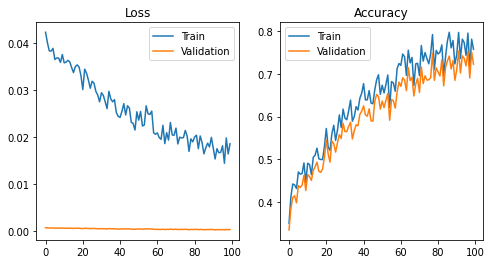

In [12]:
train_and_evaluate(cnn_lstm, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN+GRU

In [6]:
class CNN_GRU(nn.Module):
    
    def __init__(self):
        super(CNN_GRU, self).__init__()

        self.conv1 = nn.Conv2d(22, 25, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool1 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(1, 0))
        self.bn1 = nn.BatchNorm2d(25)
        self.dropout = nn.Dropout2d(p=0.5)

        self.conv2 = nn.Conv2d(25, 50, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool2 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(0, 0))
        self.bn2 = nn.BatchNorm2d(50)

        self.conv3 = nn.Conv2d(50, 100, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool3 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(0, 0))
        self.bn3 = nn.BatchNorm2d(100)

        self.conv4 = nn.Conv2d(100, 200, (10, 1), padding=(5, 0), stride=(1, 1))
        self.pool4 = nn.MaxPool2d((3, 1), stride=(3, 1),padding=(1, 0))
        self.bn4 = nn.BatchNorm2d(200)
        
        self.gru = nn.GRU(4, 64, 3, batch_first=True, dropout=0.4)
        
        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )

    
    def forward(self, x):

        # CNN
        x = x.permute(0,1,3,2)
        x = self.dropout(self.bn1(self.pool1(F.elu(self.conv1(x)))))
        x = self.dropout(self.bn2(self.pool2(F.elu(self.conv2(x)))))
        x = self.dropout(self.bn3(self.pool3(F.elu(self.conv3(x)))))
        x = self.dropout(self.bn4(self.pool4(F.elu(self.conv4(x)))))

        # GRU
        N, C, H, W = x.size()
        x = x.view(N, C, H).permute(0, 1, 2)
        out, _ = self.gru(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

In [7]:
# initiate LSTM model
cnn_gru = CNN_GRU()

# create your optimizer
optimizer = optim.Adam(cnn_gru.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/6768 (0.00%)]		Loss: 1.41579
Training Progress: 	Epoch 1 [320/6768 (4.72%)]		Loss: 1.58733
Training Progress: 	Epoch 1 [640/6768 (9.43%)]		Loss: 1.38961
Training Progress: 	Epoch 1 [960/6768 (14.15%)]		Loss: 1.54189
Training Progress: 	Epoch 1 [1280/6768 (18.87%)]		Loss: 1.39062
Training Progress: 	Epoch 1 [1600/6768 (23.58%)]		Loss: 1.35340
Training Progress: 	Epoch 1 [1920/6768 (28.30%)]		Loss: 1.41957
Training Progress: 	Epoch 1 [2240/6768 (33.02%)]		Loss: 1.36078
Training Progress: 	Epoch 1 [2560/6768 (37.74%)]		Loss: 1.39113
Training Progress: 	Epoch 1 [2880/6768 (42.45%)]		Loss: 1.43237
Training Progress: 	Epoch 1 [3200/6768 (47.17%)]		Loss: 1.37879
Training Progress: 	Epoch 1 [3520/6768 (51.89%)]		Loss: 1.38133
Training Progress: 	Epoch 1 [3840/6768 (56.60%)]		Loss: 1.36395
Training Progress: 	Epoch 1 [4160/6768 (61.32%)]		Loss: 1.31951
Training Progress: 	Epoch 1 [4480/6768 (66.04%)]		Loss: 1.41831
Training Progress: 	Epoch 1 [4800/6768 (70.75%)]	

Training Progress: 	Epoch 6 [2240/6768 (33.02%)]		Loss: 1.18436
Training Progress: 	Epoch 6 [2560/6768 (37.74%)]		Loss: 1.14928
Training Progress: 	Epoch 6 [2880/6768 (42.45%)]		Loss: 1.05320
Training Progress: 	Epoch 6 [3200/6768 (47.17%)]		Loss: 1.07682
Training Progress: 	Epoch 6 [3520/6768 (51.89%)]		Loss: 1.25832
Training Progress: 	Epoch 6 [3840/6768 (56.60%)]		Loss: 1.03469
Training Progress: 	Epoch 6 [4160/6768 (61.32%)]		Loss: 1.35234
Training Progress: 	Epoch 6 [4480/6768 (66.04%)]		Loss: 1.07639
Training Progress: 	Epoch 6 [4800/6768 (70.75%)]		Loss: 1.15955
Training Progress: 	Epoch 6 [5120/6768 (75.47%)]		Loss: 1.27010
Training Progress: 	Epoch 6 [5440/6768 (80.19%)]		Loss: 1.33134
Training Progress: 	Epoch 6 [5760/6768 (84.91%)]		Loss: 1.21183
Training Progress: 	Epoch 6 [6080/6768 (89.62%)]		Loss: 1.20702
Training Progress: 	Epoch 6 [6400/6768 (94.34%)]		Loss: 1.28491
Training Progress: 	Epoch 6 [6720/6768 (99.06%)]		Loss: 1.32289
	Train loss: 0.03763, Accuracy: 3005/676

Training Progress: 	Epoch 11 [4160/6768 (61.32%)]		Loss: 1.22107
Training Progress: 	Epoch 11 [4480/6768 (66.04%)]		Loss: 0.93878
Training Progress: 	Epoch 11 [4800/6768 (70.75%)]		Loss: 1.21955
Training Progress: 	Epoch 11 [5120/6768 (75.47%)]		Loss: 1.37546
Training Progress: 	Epoch 11 [5440/6768 (80.19%)]		Loss: 1.34402
Training Progress: 	Epoch 11 [5760/6768 (84.91%)]		Loss: 0.91321
Training Progress: 	Epoch 11 [6080/6768 (89.62%)]		Loss: 1.07545
Training Progress: 	Epoch 11 [6400/6768 (94.34%)]		Loss: 1.09386
Training Progress: 	Epoch 11 [6720/6768 (99.06%)]		Loss: 1.20530
	Train loss: 0.03347, Accuracy: 3533/6768 (52.00%)
	Validation loss: 0.00065, Accuracy: 829/1692 (48.00%)
	Test loss: 0.00067, Accuracy: 821/1772 (46.00%)

Training Progress: 	Epoch 12 [0/6768 (0.00%)]		Loss: 1.17506
Training Progress: 	Epoch 12 [320/6768 (4.72%)]		Loss: 1.22816
Training Progress: 	Epoch 12 [640/6768 (9.43%)]		Loss: 1.14690
Training Progress: 	Epoch 12 [960/6768 (14.15%)]		Loss: 0.96395
Training

Training Progress: 	Epoch 16 [5760/6768 (84.91%)]		Loss: 0.89293
Training Progress: 	Epoch 16 [6080/6768 (89.62%)]		Loss: 1.17219
Training Progress: 	Epoch 16 [6400/6768 (94.34%)]		Loss: 0.98387
Training Progress: 	Epoch 16 [6720/6768 (99.06%)]		Loss: 1.16549
	Train loss: 0.03343, Accuracy: 3419/6768 (50.00%)
	Validation loss: 0.00065, Accuracy: 804/1692 (47.00%)
	Test loss: 0.00069, Accuracy: 785/1772 (44.00%)

Training Progress: 	Epoch 17 [0/6768 (0.00%)]		Loss: 0.89529
Training Progress: 	Epoch 17 [320/6768 (4.72%)]		Loss: 1.14608
Training Progress: 	Epoch 17 [640/6768 (9.43%)]		Loss: 1.00455
Training Progress: 	Epoch 17 [960/6768 (14.15%)]		Loss: 0.91845
Training Progress: 	Epoch 17 [1280/6768 (18.87%)]		Loss: 1.23365
Training Progress: 	Epoch 17 [1600/6768 (23.58%)]		Loss: 0.70286
Training Progress: 	Epoch 17 [1920/6768 (28.30%)]		Loss: 1.15571
Training Progress: 	Epoch 17 [2240/6768 (33.02%)]		Loss: 0.76041
Training Progress: 	Epoch 17 [2560/6768 (37.74%)]		Loss: 0.85816
Training

	Validation loss: 0.00060, Accuracy: 900/1692 (53.00%)
	Test loss: 0.00068, Accuracy: 795/1772 (44.00%)

Training Progress: 	Epoch 22 [0/6768 (0.00%)]		Loss: 0.87375
Training Progress: 	Epoch 22 [320/6768 (4.72%)]		Loss: 0.99288
Training Progress: 	Epoch 22 [640/6768 (9.43%)]		Loss: 0.95629
Training Progress: 	Epoch 22 [960/6768 (14.15%)]		Loss: 0.79051
Training Progress: 	Epoch 22 [1280/6768 (18.87%)]		Loss: 1.08275
Training Progress: 	Epoch 22 [1600/6768 (23.58%)]		Loss: 0.67573
Training Progress: 	Epoch 22 [1920/6768 (28.30%)]		Loss: 1.27650
Training Progress: 	Epoch 22 [2240/6768 (33.02%)]		Loss: 0.89560
Training Progress: 	Epoch 22 [2560/6768 (37.74%)]		Loss: 0.81777
Training Progress: 	Epoch 22 [2880/6768 (42.45%)]		Loss: 0.86889
Training Progress: 	Epoch 22 [3200/6768 (47.17%)]		Loss: 1.11415
Training Progress: 	Epoch 22 [3520/6768 (51.89%)]		Loss: 0.88778
Training Progress: 	Epoch 22 [3840/6768 (56.60%)]		Loss: 0.75126
Training Progress: 	Epoch 22 [4160/6768 (61.32%)]		Loss: 0.

Training Progress: 	Epoch 27 [1280/6768 (18.87%)]		Loss: 1.05740
Training Progress: 	Epoch 27 [1600/6768 (23.58%)]		Loss: 0.58405
Training Progress: 	Epoch 27 [1920/6768 (28.30%)]		Loss: 0.95573
Training Progress: 	Epoch 27 [2240/6768 (33.02%)]		Loss: 0.80963
Training Progress: 	Epoch 27 [2560/6768 (37.74%)]		Loss: 0.88484
Training Progress: 	Epoch 27 [2880/6768 (42.45%)]		Loss: 0.83759
Training Progress: 	Epoch 27 [3200/6768 (47.17%)]		Loss: 0.95351
Training Progress: 	Epoch 27 [3520/6768 (51.89%)]		Loss: 0.86432
Training Progress: 	Epoch 27 [3840/6768 (56.60%)]		Loss: 0.83991
Training Progress: 	Epoch 27 [4160/6768 (61.32%)]		Loss: 0.83263
Training Progress: 	Epoch 27 [4480/6768 (66.04%)]		Loss: 1.03856
Training Progress: 	Epoch 27 [4800/6768 (70.75%)]		Loss: 1.07745
Training Progress: 	Epoch 27 [5120/6768 (75.47%)]		Loss: 0.92894
Training Progress: 	Epoch 27 [5440/6768 (80.19%)]		Loss: 0.99061
Training Progress: 	Epoch 27 [5760/6768 (84.91%)]		Loss: 1.07842
Training Progress: 	Epoch

Training Progress: 	Epoch 32 [2880/6768 (42.45%)]		Loss: 0.76310
Training Progress: 	Epoch 32 [3200/6768 (47.17%)]		Loss: 0.74331
Training Progress: 	Epoch 32 [3520/6768 (51.89%)]		Loss: 0.76064
Training Progress: 	Epoch 32 [3840/6768 (56.60%)]		Loss: 0.79030
Training Progress: 	Epoch 32 [4160/6768 (61.32%)]		Loss: 0.86735
Training Progress: 	Epoch 32 [4480/6768 (66.04%)]		Loss: 0.74988
Training Progress: 	Epoch 32 [4800/6768 (70.75%)]		Loss: 0.96841
Training Progress: 	Epoch 32 [5120/6768 (75.47%)]		Loss: 0.97027
Training Progress: 	Epoch 32 [5440/6768 (80.19%)]		Loss: 1.07649
Training Progress: 	Epoch 32 [5760/6768 (84.91%)]		Loss: 1.03262
Training Progress: 	Epoch 32 [6080/6768 (89.62%)]		Loss: 0.82507
Training Progress: 	Epoch 32 [6400/6768 (94.34%)]		Loss: 0.67757
Training Progress: 	Epoch 32 [6720/6768 (99.06%)]		Loss: 0.84922
	Train loss: 0.02498, Accuracy: 4450/6768 (65.00%)
	Validation loss: 0.00051, Accuracy: 1025/1692 (60.00%)
	Test loss: 0.00066, Accuracy: 848/1772 (47.00%)

Training Progress: 	Epoch 37 [4480/6768 (66.04%)]		Loss: 0.87153
Training Progress: 	Epoch 37 [4800/6768 (70.75%)]		Loss: 0.70406
Training Progress: 	Epoch 37 [5120/6768 (75.47%)]		Loss: 1.00823
Training Progress: 	Epoch 37 [5440/6768 (80.19%)]		Loss: 1.01446
Training Progress: 	Epoch 37 [5760/6768 (84.91%)]		Loss: 0.79077
Training Progress: 	Epoch 37 [6080/6768 (89.62%)]		Loss: 0.92913
Training Progress: 	Epoch 37 [6400/6768 (94.34%)]		Loss: 0.65808
Training Progress: 	Epoch 37 [6720/6768 (99.06%)]		Loss: 0.71729
	Train loss: 0.02412, Accuracy: 4539/6768 (67.00%)
	Validation loss: 0.00050, Accuracy: 1065/1692 (62.00%)
	Test loss: 0.00068, Accuracy: 831/1772 (46.00%)

Training Progress: 	Epoch 38 [0/6768 (0.00%)]		Loss: 0.90432
Training Progress: 	Epoch 38 [320/6768 (4.72%)]		Loss: 0.91909
Training Progress: 	Epoch 38 [640/6768 (9.43%)]		Loss: 0.75058
Training Progress: 	Epoch 38 [960/6768 (14.15%)]		Loss: 0.86776
Training Progress: 	Epoch 38 [1280/6768 (18.87%)]		Loss: 1.10963
Trainin

Training Progress: 	Epoch 42 [6080/6768 (89.62%)]		Loss: 0.93376
Training Progress: 	Epoch 42 [6400/6768 (94.34%)]		Loss: 0.71059
Training Progress: 	Epoch 42 [6720/6768 (99.06%)]		Loss: 0.99583
	Train loss: 0.02426, Accuracy: 4610/6768 (68.00%)
	Validation loss: 0.00051, Accuracy: 1078/1692 (63.00%)
	Test loss: 0.00070, Accuracy: 805/1772 (45.00%)

Training Progress: 	Epoch 43 [0/6768 (0.00%)]		Loss: 0.81613
Training Progress: 	Epoch 43 [320/6768 (4.72%)]		Loss: 1.00431
Training Progress: 	Epoch 43 [640/6768 (9.43%)]		Loss: 0.90005
Training Progress: 	Epoch 43 [960/6768 (14.15%)]		Loss: 0.71970
Training Progress: 	Epoch 43 [1280/6768 (18.87%)]		Loss: 0.87453
Training Progress: 	Epoch 43 [1600/6768 (23.58%)]		Loss: 0.55567
Training Progress: 	Epoch 43 [1920/6768 (28.30%)]		Loss: 0.84085
Training Progress: 	Epoch 43 [2240/6768 (33.02%)]		Loss: 0.57622
Training Progress: 	Epoch 43 [2560/6768 (37.74%)]		Loss: 0.65172
Training Progress: 	Epoch 43 [2880/6768 (42.45%)]		Loss: 0.79866
Trainin

Training Progress: 	Epoch 48 [0/6768 (0.00%)]		Loss: 0.81976
Training Progress: 	Epoch 48 [320/6768 (4.72%)]		Loss: 0.85635
Training Progress: 	Epoch 48 [640/6768 (9.43%)]		Loss: 0.74914
Training Progress: 	Epoch 48 [960/6768 (14.15%)]		Loss: 0.79193
Training Progress: 	Epoch 48 [1280/6768 (18.87%)]		Loss: 0.85264
Training Progress: 	Epoch 48 [1600/6768 (23.58%)]		Loss: 0.46267
Training Progress: 	Epoch 48 [1920/6768 (28.30%)]		Loss: 0.78293
Training Progress: 	Epoch 48 [2240/6768 (33.02%)]		Loss: 0.53399
Training Progress: 	Epoch 48 [2560/6768 (37.74%)]		Loss: 0.68901
Training Progress: 	Epoch 48 [2880/6768 (42.45%)]		Loss: 0.75093
Training Progress: 	Epoch 48 [3200/6768 (47.17%)]		Loss: 0.76841
Training Progress: 	Epoch 48 [3520/6768 (51.89%)]		Loss: 0.77053
Training Progress: 	Epoch 48 [3840/6768 (56.60%)]		Loss: 0.66554
Training Progress: 	Epoch 48 [4160/6768 (61.32%)]		Loss: 0.77395
Training Progress: 	Epoch 48 [4480/6768 (66.04%)]		Loss: 0.64335
Training Progress: 	Epoch 48 [4800

Training Progress: 	Epoch 53 [1600/6768 (23.58%)]		Loss: 0.61723
Training Progress: 	Epoch 53 [1920/6768 (28.30%)]		Loss: 0.62171
Training Progress: 	Epoch 53 [2240/6768 (33.02%)]		Loss: 0.70633
Training Progress: 	Epoch 53 [2560/6768 (37.74%)]		Loss: 0.76422
Training Progress: 	Epoch 53 [2880/6768 (42.45%)]		Loss: 0.88093
Training Progress: 	Epoch 53 [3200/6768 (47.17%)]		Loss: 0.63082
Training Progress: 	Epoch 53 [3520/6768 (51.89%)]		Loss: 0.57361
Training Progress: 	Epoch 53 [3840/6768 (56.60%)]		Loss: 0.62941
Training Progress: 	Epoch 53 [4160/6768 (61.32%)]		Loss: 0.80131
Training Progress: 	Epoch 53 [4480/6768 (66.04%)]		Loss: 0.77310
Training Progress: 	Epoch 53 [4800/6768 (70.75%)]		Loss: 0.83954
Training Progress: 	Epoch 53 [5120/6768 (75.47%)]		Loss: 0.75088
Training Progress: 	Epoch 53 [5440/6768 (80.19%)]		Loss: 0.76937
Training Progress: 	Epoch 53 [5760/6768 (84.91%)]		Loss: 0.77405
Training Progress: 	Epoch 53 [6080/6768 (89.62%)]		Loss: 0.84489
Training Progress: 	Epoch

Training Progress: 	Epoch 58 [3200/6768 (47.17%)]		Loss: 0.48265
Training Progress: 	Epoch 58 [3520/6768 (51.89%)]		Loss: 0.52789
Training Progress: 	Epoch 58 [3840/6768 (56.60%)]		Loss: 0.53463
Training Progress: 	Epoch 58 [4160/6768 (61.32%)]		Loss: 0.86713
Training Progress: 	Epoch 58 [4480/6768 (66.04%)]		Loss: 0.75696
Training Progress: 	Epoch 58 [4800/6768 (70.75%)]		Loss: 0.71074
Training Progress: 	Epoch 58 [5120/6768 (75.47%)]		Loss: 0.74336
Training Progress: 	Epoch 58 [5440/6768 (80.19%)]		Loss: 0.88063
Training Progress: 	Epoch 58 [5760/6768 (84.91%)]		Loss: 0.93534
Training Progress: 	Epoch 58 [6080/6768 (89.62%)]		Loss: 0.80162
Training Progress: 	Epoch 58 [6400/6768 (94.34%)]		Loss: 0.62043
Training Progress: 	Epoch 58 [6720/6768 (99.06%)]		Loss: 0.68130
	Train loss: 0.02106, Accuracy: 5005/6768 (73.00%)
	Validation loss: 0.00046, Accuracy: 1153/1692 (68.00%)
	Test loss: 0.00075, Accuracy: 813/1772 (45.00%)

Training Progress: 	Epoch 59 [0/6768 (0.00%)]		Loss: 0.87371
Tr

Training Progress: 	Epoch 63 [4800/6768 (70.75%)]		Loss: 0.64121
Training Progress: 	Epoch 63 [5120/6768 (75.47%)]		Loss: 0.70809
Training Progress: 	Epoch 63 [5440/6768 (80.19%)]		Loss: 0.73891
Training Progress: 	Epoch 63 [5760/6768 (84.91%)]		Loss: 0.79427
Training Progress: 	Epoch 63 [6080/6768 (89.62%)]		Loss: 0.91427
Training Progress: 	Epoch 63 [6400/6768 (94.34%)]		Loss: 0.50897
Training Progress: 	Epoch 63 [6720/6768 (99.06%)]		Loss: 0.67596
	Train loss: 0.01886, Accuracy: 5238/6768 (77.00%)
	Validation loss: 0.00041, Accuracy: 1244/1692 (73.00%)
	Test loss: 0.00071, Accuracy: 893/1772 (50.00%)

Training Progress: 	Epoch 64 [0/6768 (0.00%)]		Loss: 0.71042
Training Progress: 	Epoch 64 [320/6768 (4.72%)]		Loss: 1.02855
Training Progress: 	Epoch 64 [640/6768 (9.43%)]		Loss: 0.78826
Training Progress: 	Epoch 64 [960/6768 (14.15%)]		Loss: 0.62128
Training Progress: 	Epoch 64 [1280/6768 (18.87%)]		Loss: 0.67014
Training Progress: 	Epoch 64 [1600/6768 (23.58%)]		Loss: 0.43886
Trainin

Training Progress: 	Epoch 68 [6400/6768 (94.34%)]		Loss: 0.49997
Training Progress: 	Epoch 68 [6720/6768 (99.06%)]		Loss: 0.84673
	Train loss: 0.01623, Accuracy: 5511/6768 (81.00%)
	Validation loss: 0.00036, Accuracy: 1302/1692 (76.00%)
	Test loss: 0.00070, Accuracy: 858/1772 (48.00%)

Training Progress: 	Epoch 69 [0/6768 (0.00%)]		Loss: 0.70824
Training Progress: 	Epoch 69 [320/6768 (4.72%)]		Loss: 0.84323
Training Progress: 	Epoch 69 [640/6768 (9.43%)]		Loss: 0.55603
Training Progress: 	Epoch 69 [960/6768 (14.15%)]		Loss: 0.69518
Training Progress: 	Epoch 69 [1280/6768 (18.87%)]		Loss: 0.63135
Training Progress: 	Epoch 69 [1600/6768 (23.58%)]		Loss: 0.46113
Training Progress: 	Epoch 69 [1920/6768 (28.30%)]		Loss: 0.57917
Training Progress: 	Epoch 69 [2240/6768 (33.02%)]		Loss: 0.67849
Training Progress: 	Epoch 69 [2560/6768 (37.74%)]		Loss: 0.67863
Training Progress: 	Epoch 69 [2880/6768 (42.45%)]		Loss: 0.73431
Training Progress: 	Epoch 69 [3200/6768 (47.17%)]		Loss: 0.47376
Trainin

Training Progress: 	Epoch 74 [320/6768 (4.72%)]		Loss: 0.77976
Training Progress: 	Epoch 74 [640/6768 (9.43%)]		Loss: 0.68071
Training Progress: 	Epoch 74 [960/6768 (14.15%)]		Loss: 0.63451
Training Progress: 	Epoch 74 [1280/6768 (18.87%)]		Loss: 0.89736
Training Progress: 	Epoch 74 [1600/6768 (23.58%)]		Loss: 0.38859
Training Progress: 	Epoch 74 [1920/6768 (28.30%)]		Loss: 0.67514
Training Progress: 	Epoch 74 [2240/6768 (33.02%)]		Loss: 0.60185
Training Progress: 	Epoch 74 [2560/6768 (37.74%)]		Loss: 0.58487
Training Progress: 	Epoch 74 [2880/6768 (42.45%)]		Loss: 0.59986
Training Progress: 	Epoch 74 [3200/6768 (47.17%)]		Loss: 0.73652
Training Progress: 	Epoch 74 [3520/6768 (51.89%)]		Loss: 0.40071
Training Progress: 	Epoch 74 [3840/6768 (56.60%)]		Loss: 0.65367
Training Progress: 	Epoch 74 [4160/6768 (61.32%)]		Loss: 0.49831
Training Progress: 	Epoch 74 [4480/6768 (66.04%)]		Loss: 0.51868
Training Progress: 	Epoch 74 [4800/6768 (70.75%)]		Loss: 0.60785
Training Progress: 	Epoch 74 [

Training Progress: 	Epoch 79 [1920/6768 (28.30%)]		Loss: 0.47562
Training Progress: 	Epoch 79 [2240/6768 (33.02%)]		Loss: 0.53111
Training Progress: 	Epoch 79 [2560/6768 (37.74%)]		Loss: 0.45645
Training Progress: 	Epoch 79 [2880/6768 (42.45%)]		Loss: 0.68345
Training Progress: 	Epoch 79 [3200/6768 (47.17%)]		Loss: 0.65877
Training Progress: 	Epoch 79 [3520/6768 (51.89%)]		Loss: 0.50851
Training Progress: 	Epoch 79 [3840/6768 (56.60%)]		Loss: 0.45007
Training Progress: 	Epoch 79 [4160/6768 (61.32%)]		Loss: 0.59004
Training Progress: 	Epoch 79 [4480/6768 (66.04%)]		Loss: 0.60525
Training Progress: 	Epoch 79 [4800/6768 (70.75%)]		Loss: 0.50347
Training Progress: 	Epoch 79 [5120/6768 (75.47%)]		Loss: 0.73807
Training Progress: 	Epoch 79 [5440/6768 (80.19%)]		Loss: 0.75011
Training Progress: 	Epoch 79 [5760/6768 (84.91%)]		Loss: 0.40078
Training Progress: 	Epoch 79 [6080/6768 (89.62%)]		Loss: 0.50691
Training Progress: 	Epoch 79 [6400/6768 (94.34%)]		Loss: 0.50278
Training Progress: 	Epoch

Training Progress: 	Epoch 84 [3520/6768 (51.89%)]		Loss: 0.32582
Training Progress: 	Epoch 84 [3840/6768 (56.60%)]		Loss: 0.45078
Training Progress: 	Epoch 84 [4160/6768 (61.32%)]		Loss: 0.48301
Training Progress: 	Epoch 84 [4480/6768 (66.04%)]		Loss: 0.65514
Training Progress: 	Epoch 84 [4800/6768 (70.75%)]		Loss: 0.54674
Training Progress: 	Epoch 84 [5120/6768 (75.47%)]		Loss: 0.58829
Training Progress: 	Epoch 84 [5440/6768 (80.19%)]		Loss: 0.74238
Training Progress: 	Epoch 84 [5760/6768 (84.91%)]		Loss: 0.61527
Training Progress: 	Epoch 84 [6080/6768 (89.62%)]		Loss: 0.67553
Training Progress: 	Epoch 84 [6400/6768 (94.34%)]		Loss: 0.45520
Training Progress: 	Epoch 84 [6720/6768 (99.06%)]		Loss: 0.70636
	Train loss: 0.01410, Accuracy: 5685/6768 (83.00%)
	Validation loss: 0.00034, Accuracy: 1331/1692 (78.00%)
	Test loss: 0.00074, Accuracy: 890/1772 (50.00%)

Training Progress: 	Epoch 85 [0/6768 (0.00%)]		Loss: 0.71603
Training Progress: 	Epoch 85 [320/6768 (4.72%)]		Loss: 0.84997
Trai

Training Progress: 	Epoch 89 [5120/6768 (75.47%)]		Loss: 0.66050
Training Progress: 	Epoch 89 [5440/6768 (80.19%)]		Loss: 0.68106
Training Progress: 	Epoch 89 [5760/6768 (84.91%)]		Loss: 0.61595
Training Progress: 	Epoch 89 [6080/6768 (89.62%)]		Loss: 0.79980
Training Progress: 	Epoch 89 [6400/6768 (94.34%)]		Loss: 0.48536
Training Progress: 	Epoch 89 [6720/6768 (99.06%)]		Loss: 0.38198
	Train loss: 0.01241, Accuracy: 5797/6768 (85.00%)
	Validation loss: 0.00030, Accuracy: 1350/1692 (79.00%)
	Test loss: 0.00066, Accuracy: 951/1772 (53.00%)

Training Progress: 	Epoch 90 [0/6768 (0.00%)]		Loss: 0.93661
Training Progress: 	Epoch 90 [320/6768 (4.72%)]		Loss: 0.77639
Training Progress: 	Epoch 90 [640/6768 (9.43%)]		Loss: 0.50607
Training Progress: 	Epoch 90 [960/6768 (14.15%)]		Loss: 0.61590
Training Progress: 	Epoch 90 [1280/6768 (18.87%)]		Loss: 0.61648
Training Progress: 	Epoch 90 [1600/6768 (23.58%)]		Loss: 0.43745
Training Progress: 	Epoch 90 [1920/6768 (28.30%)]		Loss: 0.68617
Trainin

Training Progress: 	Epoch 94 [6720/6768 (99.06%)]		Loss: 0.49332
	Train loss: 0.01237, Accuracy: 5900/6768 (87.00%)
	Validation loss: 0.00030, Accuracy: 1393/1692 (82.00%)
	Test loss: 0.00065, Accuracy: 1013/1772 (57.00%)

Training Progress: 	Epoch 95 [0/6768 (0.00%)]		Loss: 0.53156
Training Progress: 	Epoch 95 [320/6768 (4.72%)]		Loss: 0.59032
Training Progress: 	Epoch 95 [640/6768 (9.43%)]		Loss: 0.73755
Training Progress: 	Epoch 95 [960/6768 (14.15%)]		Loss: 0.56260
Training Progress: 	Epoch 95 [1280/6768 (18.87%)]		Loss: 0.68426
Training Progress: 	Epoch 95 [1600/6768 (23.58%)]		Loss: 0.26609
Training Progress: 	Epoch 95 [1920/6768 (28.30%)]		Loss: 0.25162
Training Progress: 	Epoch 95 [2240/6768 (33.02%)]		Loss: 0.47875
Training Progress: 	Epoch 95 [2560/6768 (37.74%)]		Loss: 0.62556
Training Progress: 	Epoch 95 [2880/6768 (42.45%)]		Loss: 0.61592
Training Progress: 	Epoch 95 [3200/6768 (47.17%)]		Loss: 0.81667
Training Progress: 	Epoch 95 [3520/6768 (51.89%)]		Loss: 0.41756
Traini

Training Progress: 	Epoch 100 [640/6768 (9.43%)]		Loss: 0.46378
Training Progress: 	Epoch 100 [960/6768 (14.15%)]		Loss: 0.44905
Training Progress: 	Epoch 100 [1280/6768 (18.87%)]		Loss: 0.56168
Training Progress: 	Epoch 100 [1600/6768 (23.58%)]		Loss: 0.34737
Training Progress: 	Epoch 100 [1920/6768 (28.30%)]		Loss: 0.40309
Training Progress: 	Epoch 100 [2240/6768 (33.02%)]		Loss: 0.28881
Training Progress: 	Epoch 100 [2560/6768 (37.74%)]		Loss: 0.53347
Training Progress: 	Epoch 100 [2880/6768 (42.45%)]		Loss: 0.40638
Training Progress: 	Epoch 100 [3200/6768 (47.17%)]		Loss: 0.32503
Training Progress: 	Epoch 100 [3520/6768 (51.89%)]		Loss: 0.47302
Training Progress: 	Epoch 100 [3840/6768 (56.60%)]		Loss: 0.33588
Training Progress: 	Epoch 100 [4160/6768 (61.32%)]		Loss: 0.49761
Training Progress: 	Epoch 100 [4480/6768 (66.04%)]		Loss: 0.47269
Training Progress: 	Epoch 100 [4800/6768 (70.75%)]		Loss: 0.90441
Training Progress: 	Epoch 100 [5120/6768 (75.47%)]		Loss: 0.65027
Training Prog

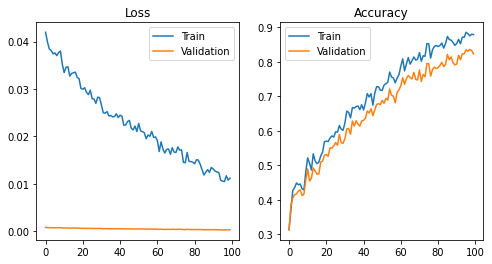

In [15]:
train_and_evaluate(cnn_gru, optimizer, data_loaders, num_epochs=EPOCHS)

# GAN Data Augmentation

In [10]:
fake_WGAN = np.load('./GAN/WGAN_generate_X_subject1.npy')
fake_label = np.load('./GAN/generate_label_subject1.npy')


fake_WGAN = np.swapaxes(fake_WGAN, 1,2)
fake_WGAN = np.swapaxes(fake_WGAN,2,3)


#Add 8460/4 fake data
x_train_plus = np.vstack((x_train, fake_WGAN[0:fake_WGAN.shape[0]//4]))
y_train_plus = np.vstack((y_train, fake_label[0:fake_WGAN.shape[0]//4]))
p = np.random.permutation(x_train.shape[0])
x_train_plus, y_train_plus = x_train_plus[p], y_train_plus[p]

In [11]:
data_loaders_gan = dataloader_setup(x_train_plus, y_train_plus, x_valid, y_valid, x_test, y_test, batch_size=32)

## CNN+GAN

In [ ]:
train_and_evaluate(cnn, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## LSTM+GAN

In [ ]:
train_and_evaluate(lstm, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## GRU+GAN

In [ ]:
train_and_evaluate(gru, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## CNN+LSTM+GAN

In [ ]:
train_and_evaluate(cnn_lstm, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## CNN+GRU+GAN

In [ ]:
train_and_evaluate(cnn_gru, optimizer, data_loaders_gan, num_epochs=EPOCHS)